# Code Exiobase_EU_ETS_2 by Martínez-Hernando


This information is necessary in Python, for activate the funtions 
If they are not installed is necessary to do it, write pip install XXXXX. If pip doesn't work put pip3, or pip3.11 (search on internet)

Activate generical information

In [1]:
import pandas as pd #To real CSV and dataframes
import numpy as np #To work with matrix
from scipy import io, integrate, linalg, signal #Google told me, I don´t know what is it
from scipy.sparse.linalg import cg, eigs #Google told me, I don´t know what is it

To create list

In [2]:
from typing import List, Tuple, Dict, Callable, Iterable, Union

 # To use pymrio

In [3]:
import pymrio as mr

Declare new IO system

In [4]:
exio3318=mr.IOSystem()

## Importing EXIOBASE 3.3.18 data
We will only import:
- $Z$, the intermediate consumption,
- $Y$, the final demand,
- $F$ and $F_Y$, the environmental extensions, only for air emissions.

In [5]:
exiobase_folder="P:/Universidad/Exiobase/" #Put here your folder where you have download Exiobase with /, no with \

Z (Intermediate products)

In [6]:
Z_raw=pd.read_csv(exiobase_folder + "MR_HIOT_2011_v3_3_18_by_product_technology.csv", #You should have this name of file, if not change it
                    index_col = [0,1,2,3,4],
                    header = [0,1,2,3])
Z_raw.head() #To see the first lines

AU  \
                                               Cultivation of paddy rice   
                                                                   i01.a   
                                                                  A_PARI   
AU Paddy rice              p01.a C_PARI tonnes                       0.0   
   Wheat                   p01.b C_WHEA tonnes                       0.0   
   Cereal grains nec       p01.c C_OCER tonnes                       0.0   
   Vegetables, fruit, nuts p01.d C_FVEG tonnes                       0.0   
   Oil seeds               p01.e C_OILS tonnes                       0.0   

                                                                     \
                                               Cultivation of wheat   
                                                              i01.b   
                                                             A_WHEA   
AU Paddy rice              p01.a C_PARI tonnes                  0.0   
   Wheat                   p01.b C_WHEA tonnes                  0.0   
   Cereal grains nec       p01.c C_OCER tonnes                  0.0   
   Vegetables, fruit, nuts p01.d C_FVEG tonnes                  0.0   
   Oil seeds               p01.e C_OILS tonnes                  0.0   

                                                                                 \
                                               Cultivation of cereal grains nec   
                                                                          i01.c   
                                                                         A_OCER   
AU Paddy rice              p01.a C_PARI tonnes                          0.00000   
   Wheat                   p01.b C_WHEA tonnes                          0.00000   
   Cereal grains nec       p01.c C_OCER tonnes                      70942.96547   
   Vegetables, fruit, nuts p01.d C_FVEG tonnes                          0.00000   
   Oil seeds               p01.e C_OILS tonnes                          0.00000   

                                                                                       \
                                               Cultivation of vegetables, fruit, nuts   
                                                                                i01.d   
                                                                               A_FVEG   
AU Paddy rice              p01.a C_PARI tonnes                                0.00000   
   Wheat                   p01.b C_WHEA tonnes                                0.00000   
   Cereal grains nec       p01.c C_OCER tonnes                                0.00000   
   Vegetables, fruit, nuts p01.d C_FVEG tonnes                            18266.75262   
   Oil seeds               p01.e C_OILS tonnes                                0.00000   

                                                                         \
                                               Cultivation of oil seeds   
                                                                  i01.e   
                                                                 A_OILS   
AU Paddy rice              p01.a C_PARI tonnes                      0.0   
   Wheat                   p01.b C_WHEA tonnes                      0.0   
   Cereal grains nec       p01.c C_OCER tonnes                      0.0   
   Vegetables, fruit, nuts p01.d C_FVEG tonnes                      0.0   
   Oil seeds               p01.e C_OILS tonnes                      0.0   

                                                                                      \
                                               Cultivation of sugar cane, sugar beet   
                                                                               i01.f   
                                                                              A_SUGB   
AU Paddy rice              p01.a C_PARI tonnes                                   0.0   
   Wheat                   p01.b C_WHEA tonnes                                 

In [7]:
Z_reindexed=Z_raw.droplevel([2,3,4], axis=0).copy() #To remove useless rows
Z_reindexed.index.names=["region","sector"]
Z_reindexed.columns=Z_reindexed.index
Z_reindexed.head()


region                                 AU                          \
sector                         Paddy rice Wheat Cereal grains nec   
region sector                                                       
AU     Paddy rice                     0.0   0.0           0.00000   
       Wheat                          0.0   0.0           0.00000   
       Cereal grains nec              0.0   0.0       70942.96547   
       Vegetables, fruit, nuts        0.0   0.0           0.00000   
       Oil seeds                      0.0   0.0           0.00000   

region                                                            \
sector                         Vegetables, fruit, nuts Oil seeds   
region sector                                                      
AU     Paddy rice                              0.00000       0.0   
       Wheat                                   0.00000       0.0   
       Cereal grains nec                       0.00000       0.0   
       Vegetables, fruit, nuts             18266.75262       0.0   
       Oil seeds                               0.00000       0.0   

region                                                                    \
sector                         Sugar cane, sugar beet Plant-based fibers   
region sector                                                              
AU     Paddy rice                                 0.0               0.00   
       Wheat                                      0.0               0.00   
       Cereal grains nec                          0.0               0.00   
       Vegetables, fruit, nuts                    0.0               0.00   
       Oil seeds                                  0.0        -1206065.87   

region                                                                 ...  \
sector                         Crops nec        Cattle           Pigs  ...   
region sector                                                          ...   
AU     Paddy rice                    0.0  0.000000e+00       0.000000  ...   
       Wheat                         0.0  6.791574e+05  156083.893300  ...   
       Cereal grains nec             0.0  2.277000e+06  823314.442100  ...   
       Vegetables, fruit, nuts       0.0  1.552051e+03     255.322381  ...   
       Oil seeds                     0.0  0.000000e+00       0.000000  ...   

region                                                    WM  \
sector                         Paper for treatment: landfill   
region sector                                                  
AU     Paddy rice                                        0.0   
       Wheat                                             0.0   
       Cereal grains nec                                 0.0   
       Vegetables, fruit, nuts                           0.0   
       Oil seeds                                         0.0   

region                                                                \
sector                         Plastic waste for treatment: landfill   
region sector                                                          
AU     Paddy rice                                                0.0   
       Wheat                                                     0.0   
       Cereal grains nec                                         0.0   
       Vegetables, fruit, nuts                                   0.0   
       Oil seeds                                                 0.0   

region                                                                              \
sector                         Inert/metal/hazardous waste for treatment: landfill   
region sector                                                                        
AU     Paddy rice                                                             0.0    
       Wheat                                                                  0.0    
       Cereal grains nec                                                      0.0    
       Vegetables, fruit, nuts                                

In [8]:
exio3318.Z=Z_reindexed

Y (Final demand)

In [9]:
Y_raw = pd.read_csv(exiobase_folder + "MR_HIOT_2011_v3_3_18_FD.csv", #You should have this name of file, if not change it
                    index_col = [0,1,2,3,4],
                    header = [0,1,2,3])

Y_reindexed=Y_raw.droplevel([2,3], axis=1).copy() #To remove useless columns
Y_reindexed.index=Z_reindexed.index
Y_reindexed.columns.names=["region", "sector"] #To name the columns
exio3318.Y=Y_reindexed

In [10]:
exio3318.Y.head()

region                                                                  AU  \
sector                         Final consumption expenditure by households   
region sector                                                                
AU     Paddy rice                                             0.000000e+00   
       Wheat                                                  0.000000e+00   
       Cereal grains nec                                      0.000000e+00   
       Vegetables, fruit, nuts                                1.255628e+06   
       Oil seeds                                              7.501443e+02   

region                                                                                                               \
sector                         Final consumption expenditure by non-profit organisations serving households (NPISH)   
region sector                                                                                                         
AU     Paddy rice                                                        0.000000                                     
       Wheat                                                        317232.259200                                     
       Cereal grains nec                                             20796.255720                                     
       Vegetables, fruit, nuts                                        9066.727501                                     
       Oil seeds                                                       414.340678                                     

region                                                                      \
sector                         Final consumption expenditure by government   
region sector                                                                
AU     Paddy rice                                                 0.000000   
       Wheat                                                 635980.576100   
       Cereal grains nec                                      43596.865240   
       Vegetables, fruit, nuts                                13660.087220   
       Oil seeds                                                402.405072   

region                                                        \
sector                         Gross fixed capital formation   
region sector                                                  
AU     Paddy rice                                        0.0   
       Wheat                                             0.0   
       Cereal grains nec                                 0.0   
       Vegetables, fruit, nuts                           0.0   
       Oil seeds                                         0.0   

region                                                                      \
sector                         Changes in inventories Changes in valuables   
region sector                                                                
AU     Paddy rice                             0.00000                    0   
       Wheat                                  0.00000                    0   
       Cereal grains nec                      0.00000                    0   
       Vegetables, fruit, nuts            25217.20699                    0   
       Oil seeds                          11344.59956                    0   

region                                                                  AT  \
sector                         Final consumption expenditure by households   
region sector                                                                
AU     Paddy rice                                                 0.000000   
       Wheat                                                      0.000000   
       Cereal grains nec                                          0.645819   
       Vegetables, fruit, nuts                                  262.282173   
       Oil seeds                                                  0.000000   

region                            

Test that the core elements are well-parsed

In [11]:
exio3318.calc_system() #To calculate the rest of matrix
exio3318.A.head() #To show A (technical coefficients)
exio3318.L.head() #To show L (Leontief matrix I-A)

region                                 AU                              \
sector                         Paddy rice     Wheat Cereal grains nec   
region sector                                                           
AU     Paddy rice                1.000009  0.000008          0.000006   
       Wheat                     0.000216  1.000193          0.000137   
       Cereal grains nec         0.000088  0.000081          1.007140   
       Vegetables, fruit, nuts   0.000020  0.000019          0.000012   
       Oil seeds                 0.000009  0.000010          0.000024   

region                                                            \
sector                         Vegetables, fruit, nuts Oil seeds   
region sector                                                      
AU     Paddy rice                             0.000049  0.000027   
       Wheat                                  0.001163  0.000679   
       Cereal grains nec                      0.000583  0.000366   
       Vegetables, fruit, nuts                1.005752  0.000030   
       Oil seeds                              0.000144  1.000765   

region                                                                    \
sector                         Sugar cane, sugar beet Plant-based fibers   
region sector                                                              
AU     Paddy rice                            0.000004           0.000104   
       Wheat                                 0.000125           0.002369   
       Cereal grains nec                     0.000041           0.000951   
       Vegetables, fruit, nuts               0.000009           0.000248   
       Oil seeds                             0.000003          -1.552196   

region                                                        ...  \
sector                         Crops nec    Cattle      Pigs  ...   
region sector                                                 ...   
AU     Paddy rice               0.001503  0.005874  0.000821  ...   
       Wheat                    0.062994  0.628912  0.714555  ...   
       Cereal grains nec        0.019043  2.059080  3.760873  ...   
       Vegetables, fruit, nuts  0.003652  0.065239  0.116988  ...   
       Oil seeds                0.003211  0.068144  0.142334  ...   

region                                                    WM  \
sector                         Paper for treatment: landfill   
region sector                                                  
AU     Paddy rice                               3.028264e-08   
       Wheat                                    2.976197e-06   
       Cereal grains nec                        3.354884e-06   
       Vegetables, fruit, nuts                  1.959977e-07   
       Oil seeds                               -5.969246e-06   

region                                                                \
sector                         Plastic waste for treatment: landfill   
region sector                                                          
AU     Paddy rice                                       1.159917e-08   
       Wheat                                            3.506702e-06   
       Cereal grains nec                                2.519620e-07   
       Vegetables, fruit, nuts                          1.428908e-07   
       Oil seeds                                       -1.526406e-06   

region                                                                              \
sector                         Inert/metal/hazardous waste for treatment: landfill   
region sector                                                                        
AU     Paddy rice                                                    2.102449e-09    
       Wheat                                                         2.009846e-07    
       Cereal grains nec                                             5.861412e-08    
       Vegetables, fruit, nuts                                       1.290512e-08    
       Oil seeds

F and F_Y (Extensions, total emissions per activity)

In [12]:
exio3318.emissions=mr.Extension("emissions")
F_raw = pd.read_excel(exiobase_folder + "MR_HIOT_2011_v3_3_18_extensions.xlsx", #This data is emissions of intermediate production
                      sheet_name="Emiss_act", #You should have this name of file, if not change it.
                      index_col=[0,1,2],
                      header=[0,1,2,3])
F_raw.columns=Z_reindexed.columns

F_Y_raw=pd.read_excel(exiobase_folder + "MR_HIOT_2011_v3_3_18_extensions.xlsx", #This data is emissions of final demand
                      sheet_name="Emiss_FD", #You should have this name of file, if not change it.
                      index_col=[0,1,2],
                      header=[0,1,2,3])
F_Y_raw.columns=Y_reindexed.columns

F_raw.head()
F_Y_raw.head()
exio3318.emissions.F=F_raw
exio3318.emissions.F_Y=F_Y_raw

In [13]:
F_Y_raw.head()

region                                                                     AU  \
sector                            Final consumption expenditure by households   
Carbon dioxide, fossil tonnes air                                4.760370e+07   
N2O                    tonnes air                                9.248053e+02   
CH4                    tonnes air                                4.907784e+04   
HFCs                   tonnes air                                0.000000e+00   
PFCs                   tonnes air                                0.000000e+00   

region                                                                                                                  \
sector                            Final consumption expenditure by non-profit organisations serving households (NPISH)   
Carbon dioxide, fossil tonnes air                                           0.000000                                     
N2O                    tonnes air                                           0.000000                                     
CH4                    tonnes air                                         200.749203                                     
HFCs                   tonnes air                                           0.000000                                     
PFCs                   tonnes air                                           0.000000                                     

region                                                                         \
sector                            Final consumption expenditure by government   
Carbon dioxide, fossil tonnes air                                    0.000000   
N2O                    tonnes air                                    0.000000   
CH4                    tonnes air                                  343.422972   
HFCs                   tonnes air                                    0.000000   
PFCs                   tonnes air                                    0.000000   

region                                                           \
sector                            Gross fixed capital formation   
Carbon dioxide, fossil tonnes air                             0   
N2O                    tonnes air                             0   
CH4                    tonnes air                             0   
HFCs                   tonnes air                             0   
PFCs                   tonnes air                             0   

region                                                                         \
sector                            Changes in inventories Changes in valuables   
Carbon dioxide, fossil tonnes air                      0                    0   
N2O                    tonnes air                      0                    0   
CH4                    tonnes air                      0                    0   
HFCs                   tonnes air                      0                    0   
PFCs                   tonnes air                      0                    0   

region                                                                     AT  \
sector                            Final consumption expenditure by households   
Carbon dioxide, fossil tonnes air                                2.287570e+07   
N2O                    tonnes air                                6.054108e+02   
CH4                    tonnes air                                1.750280e+04   
HFCs                   tonnes air                                0.000000e+00   
PFCs                   tonnes air                                0.000000e+00   

region                                                                                                                  \
sector                            Final consumption expenditure by non-profit organisations serving households (NPISH)   
Carbon dioxide, fossil tonnes air                                                  0                                     
N2O                    tonnes air    

# Updating the electricity mix

Vector of variation of electricity mix (lambda). Most numbers are ones because they are not electricity mix

In [14]:
vector_lambda=pd.read_csv(exiobase_folder + "MR_2022_lambda_ember.csv", #You should have this name of file, if not change it
                    index_col = [0,1],
                    header = [0])
vector_lambda.index=exio3318.Z.index
vector_lambda=vector_lambda.squeeze()
vector_lambda

region  sector                                           
AU      Paddy rice                                           1.0
        Wheat                                                1.0
        Cereal grains nec                                    1.0
        Vegetables, fruit, nuts                              1.0
        Oil seeds                                            1.0
                                                            ... 
WM      Membership organisation services n.e.c. (91)         1.0
        Recreational, cultural and sporting services (92)    1.0
        Other services (93)                                  1.0
        Private households with employed persons (95)        1.0
        Extra-territorial organizations and bodies           1.0
Name: Value, Length: 7872, dtype: float64

Creation of new Z that multiplies columns and raws by lambda

In [16]:
Z_1=exio3318.Z.mul(vector_lambda, axis=0)
Z_1=Z_1.mul(vector_lambda, axis=1)

Comprobation

In [17]:
print(exio3318.Z.loc[('ES','Electricity by coal'),('ES','Bottles for treatment, Recycling of bottles by direct reuse')])
print(vector_lambda.loc[('ES','Electricity by coal')])
Z_1.loc[('ES','Electricity by coal'),('ES','Bottles for treatment, Recycling of bottles by direct reuse')]


28.90295069
0.170386975


4.924686336643263

Z modified to update activities which in 2011 has no production of one type of electricity and in 2022 they have. It has been done using the proportion of rows and columns of the region where country is or a near country

In [18]:
Z_gamma=pd.read_csv(exiobase_folder + "MR_HIOT_2011_v3_3_18_Z_gamma.csv", #You should have this name of file, if not change it
                    index_col = [0,1],
                    header = [0,1])
Z_gamma.index=exio3318.Z.index
Z_gamma.columns=exio3318.Z.columns
Z_gamma #To see the first lines

region                                                           AU        \
sector                                                   Paddy rice Wheat   
region sector                                                               
AU     Paddy rice                                                 0     0   
       Wheat                                                      0     0   
       Cereal grains nec                                          0     0   
       Vegetables, fruit, nuts                                    0     0   
       Oil seeds                                                  0     0   
...                                                             ...   ...   
WM     Membership organisation services n.e.c. (91)               0     0   
       Recreational, cultural and sporting services (92)          0     0   
       Other services (93)                                        0     0   
       Private households with employed persons (95)              0     0   
       Extra-territorial organizations and bodies                 0     0   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AU     Paddy rice                                                        0   
       Wheat                                                             0   
       Cereal grains nec                                                 0   
       Vegetables, fruit, nuts                                           0   
       Oil seeds                                                         0   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)                      0   
       Recreational, cultural and sporting services (92)                 0   
       Other services (93)                                               0   
       Private households with employed persons (95)                     0   
       Extra-territorial organizations and bodies                        0   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AU     Paddy rice                                                              0   
       Wheat                                                                   0   
       Cereal grains nec                                                       0   
       Vegetables, fruit, nuts                                                 0   
       Oil seeds                                                               0   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                            0   
       Recreational, cultural and sporting services (92)                       0   
       Other services (93)                                                     0   
       Private households with employed persons (95)                           0   
       Extra-territorial organizations and bodies                              0   

region                                                              \
sector                                                   Oil seeds   
region sector                                                        
AU     Paddy rice                                                0   
       Wheat                                                     0   
       Cereal grains nec                                         0   
       Vegetables, fruit, nuts                                   0   
       Oil seeds                                                 0   
...                                                            ...   
WM     Membership org

In [19]:
Z_gamma.isna().values.any() #To check all data is ok, is have to be false

False

In [20]:
Z_new=Z_1+Z_gamma
Z_new

region                                                           AU            \
sector                                                   Paddy rice     Wheat   
region sector                                                                   
AU     Paddy rice                                          0.000000  0.000000   
       Wheat                                               0.000000  0.000000   
       Cereal grains nec                                   0.000000  0.000000   
       Vegetables, fruit, nuts                             0.000000  0.000000   
       Oil seeds                                           0.000000  0.000000   
...                                                             ...       ...   
WM     Membership organisation services n.e.c. (91)        0.000351  0.001041   
       Recreational, cultural and sporting services (92)   0.000000  0.000148   
       Other services (93)                                 0.000060  0.000216   
       Private households with employed persons (95)       0.000000  0.000000   
       Extra-territorial organizations and bodies          0.000000  0.000000   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AU     Paddy rice                                                 0.000000   
       Wheat                                                      0.000000   
       Cereal grains nec                                      70942.965470   
       Vegetables, fruit, nuts                                    0.000000   
       Oil seeds                                                  0.000000   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)               0.001017   
       Recreational, cultural and sporting services (92)          0.000236   
       Other services (93)                                        0.000583   
       Private households with employed persons (95)              0.000000   
       Extra-territorial organizations and bodies                 0.000000   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AU     Paddy rice                                                       0.000000   
       Wheat                                                            0.000000   
       Cereal grains nec                                                0.000000   
       Vegetables, fruit, nuts                                      18266.752620   
       Oil seeds                                                        0.000000   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                     0.003093   
       Recreational, cultural and sporting services (92)                0.006582   
       Other services (93)                                              0.000521   
       Private households with employed persons (95)                    0.000000   
       Extra-territorial organizations and bodies                       0.000000   

region                                                              \
sector                                                   Oil seeds   
region sector                                                        
AU     Paddy rice                                         0.000000   
       Wheat                                              0.000000   
       Cereal grains nec                                  0.000000   
       Vegetables, fruit, nuts                            0.000000   
       Oil seeds                                          0.000000   
...                                

New value of Z, do not run if you will edit cells below

In [21]:
exio3318.Z=Z_new
exio3318.Z
exio3318.Z.isna().values.any() #To check all data is ok, it has to be false

False

To do again the calculations

In [22]:
exio3318.reset_all_full() #reset
exio3318.calc_all() #calculation of the rest of matrix again

c:\Users\marpi\anaconda3\envs\input_output_bw25\Lib\site-packages\pymrio\core\mriosystem.py:900: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  Y_agg = Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\input_output_bw25\Lib\site-packages\pymrio\core\mriosystem.py:956: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  F_Y_agg = self.F_Y.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\input_output_bw25\Lib\site-packages\pymrio\core\mriosystem.py:984: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  self.D_cba.groupby(level="region", axis=1, sort=False).sum()
c:\Users\marpi\anaconda3\envs\input_output_bw25\Lib\site-packages\pymrio\core\mriosystem.py:993: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` withou

# Information calculated by pymrio

Total production vector (hybrid units)

In [23]:
exio3318.x

indout
region sector                                                         
AU     Paddy rice                                         6.147906e+05
       Wheat                                              2.329856e+07
       Cereal grains nec                                  1.009107e+07
       Vegetables, fruit, nuts                            3.256927e+06
       Oil seeds                                          4.010747e+05
...                                                                ...
WM     Membership organisation services n.e.c. (91)       1.549911e+04
       Recreational, cultural and sporting services (92)  3.103591e+04
       Other services (93)                                2.187645e+04
       Private households with employed persons (95)      5.306091e+03
       Extra-territorial organizations and bodies         0.000000e+00

[7872 rows x 1 columns]

This are the UNITARY emissions direct per activity and per functional unit (F/X). Called S direct emissions

In [24]:
exio3318.emissions.S
#exio3318.emissions.S.loc["Carbon dioxide, fossil", ("AU","Nickel ores and concentrates")] #To look for an specific activity

region                                        AU                              \
sector                                Paddy rice     Wheat Cereal grains nec   
Carbon dioxide, fossil   tonnes air     0.061182  0.083341          0.048647   
N2O                      tonnes air     0.000072  0.000407          0.000385   
CH4                      tonnes air     0.043148  0.000007          0.000014   
HFCs                     tonnes air     0.000000  0.000000          0.000000   
PFCs                     tonnes air     0.000000  0.000000          0.000000   
...                                          ...       ...               ...   
Ni                       tonnes soil    0.000000  0.000000          0.000000   
C                        tonnes air     0.000000  0.000000          0.000000   
other emissions          tonnes undef   0.000718  0.001592          0.003508   
Carbon dioxide, biogenic tonnes air     0.000156  0.000226          0.000120   
Other emissions nec      tonnes air     0.000000  0.000000          0.000000   

region                                                                   \
sector                                Vegetables, fruit, nuts Oil seeds   
Carbon dioxide, fossil   tonnes air                  0.075276  0.207100   
N2O                      tonnes air                  0.002579  0.001156   
CH4                      tonnes air                  0.000021  0.000051   
HFCs                     tonnes air                  0.000000  0.000000   
PFCs                     tonnes air                  0.000000  0.000000   
...                                                       ...       ...   
Ni                       tonnes soil                 0.000000  0.000000   
C                        tonnes air                  0.000000  0.000000   
other emissions          tonnes undef                0.018467  0.093876   
Carbon dioxide, biogenic tonnes air                  0.000174  0.000465   
Other emissions nec      tonnes air                  0.000000  0.000000   

region                                                        \
sector                                Sugar cane, sugar beet   
Carbon dioxide, fossil   tonnes air                 0.022910   
N2O                      tonnes air                 0.000154   
CH4                      tonnes air                 0.000003   
HFCs                     tonnes air                 0.000000   
PFCs                     tonnes air                 0.000000   
...                                                      ...   
Ni                       tonnes soil                0.000000   
C                        tonnes air                 0.000000   
other emissions          tonnes undef               0.000443   
Carbon dioxide, biogenic tonnes air                 0.000029   
Other emissions nec      tonnes air                 0.000000   

region                                                                         \
sector                                Plant-based fibers Crops nec     Cattle   
Carbon dioxide, fossil   tonnes air             0.194659  2.324852   2.518185   
N2O                      tonnes air             0.001496  0.001338   0.066299   
CH4                      tonnes air             0.000016  0.000239   1.433311   
HFCs                     tonnes air             0.000000  0.000000   0.000000   
PFCs                     tonnes air             0.000000  0.000000   0.000000   
...                                                  ...       ...        ...   
Ni                       tonnes soil            0.000000  0.000000   0.000000   
C                        tonnes air             0.000000  0.000000   0.000000   
other emissions          tonnes undef           0.137745  0.293020  55.700957   
Carbon dioxide, biogenic tonnes air             0.000553  0.002584   0.000375   
Other emissions nec      tonnes air             0.000000  0.000000   0.000000   

region                                           ...  \
sector                                  

This are the UNITARY emissions per activity and per functional unit (F/X*L). Called M unitary emissions
Their column are like D_cba if Y is zeros with only a one

In [25]:
exio3318.emissions.M
#exio3318.emissions.M.xs("Precious metals", level="sector", axis=1)[0:3]
#exio3318.emissions.M.loc[('Carbon dioxide, fossil','tonnes','air'),("ZA","Precious metals")]


region                                        AU                              \
sector                                Paddy rice     Wheat Cereal grains nec   
Carbon dioxide, fossil   tonnes air     0.501781  0.191213          0.143340   
N2O                      tonnes air     0.000113  0.000503          0.000484   
CH4                      tonnes air     0.044835  0.000594          0.000496   
HFCs                     tonnes air     0.000000  0.000000          0.000000   
PFCs                     tonnes air     0.000000  0.000000          0.000000   
...                                          ...       ...               ...   
Ni                       tonnes soil    0.000000  0.000000          0.000000   
C                        tonnes air     0.000000  0.000000          0.000000   
other emissions          tonnes undef   0.003431  0.004415          0.006219   
Carbon dioxide, biogenic tonnes air     0.004503  0.003388          0.003113   
Other emissions nec      tonnes air     0.000000  0.000000          0.000000   

region                                                                   \
sector                                Vegetables, fruit, nuts Oil seeds   
Carbon dioxide, fossil   tonnes air                  0.987120  0.576629   
N2O                      tonnes air                  0.003038  0.001299   
CH4                      tonnes air                  0.003738  0.002457   
HFCs                     tonnes air                  0.000000  0.000000   
PFCs                     tonnes air                  0.000000  0.000000   
...                                                       ...       ...   
Ni                       tonnes soil                 0.000000  0.000000   
C                        tonnes air                  0.000000  0.000000   
other emissions          tonnes undef                0.039946  0.106343   
Carbon dioxide, biogenic tonnes air                  0.027958  0.015696   
Other emissions nec      tonnes air                  0.000000  0.000000   

region                                                        \
sector                                Sugar cane, sugar beet   
Carbon dioxide, fossil   tonnes air                 0.064801   
N2O                      tonnes air                 0.000190   
CH4                      tonnes air                 0.000213   
HFCs                     tonnes air                 0.000000   
PFCs                     tonnes air                 0.000000   
...                                                      ...   
Ni                       tonnes soil                0.000000   
C                        tonnes air                 0.000000   
other emissions          tonnes undef               0.001714   
Carbon dioxide, biogenic tonnes air                 0.001552   
Other emissions nec      tonnes air                 0.000000   

region                                                                         \
sector                                Plant-based fibers Crops nec     Cattle   
Carbon dioxide, fossil   tonnes air             0.602701  6.854347   4.598722   
N2O                      tonnes air            -0.000096  0.002415   0.071713   
CH4                      tonnes air             0.002601  0.040455   1.473177   
HFCs                     tonnes air             0.000000  0.000000   0.000000   
PFCs                     tonnes air             0.000000  0.000000   0.000000   
...                                                  ...       ...        ...   
Ni                       tonnes soil            0.000000  0.000000   0.000000   
C                        tonnes air             0.000000  0.000000   0.000000   
other emissions          tonnes undef           0.014705  0.737733  58.410532   
Carbon dioxide, biogenic tonnes air             0.036220  0.625736   3.876605   
Other emissions nec      tonnes air             0.000000  0.000000   0.000000   

region                                           ...  \
sector                                  

This is the value we are looking for is M, but no the matrix multiplication (which is a sum), is a element-by-element information to keep all information needed. Impact_wanted is emmissions per functional unit of exiobase

Chain 1 WL+CN

In [300]:
country_mining_1=input('Which country is doing mining?) ISO-2 code')
country_metal_1=input('Which country is doing metallurgy?) ISO-2 code')
mining='Copper ores and concentrates'
metal='Copper products'

impact_mining_1=exio3318.emissions.S*exio3318.L.loc[:,(country_mining_1,mining)]
impact_mining_1=impact_mining_1.T
impact_mining_1

impact_metal_1=exio3318.emissions.S*exio3318.L.loc[:,(country_metal_1,metal)]
impact_metal_1=impact_metal_1.T
impact_metal_1.loc[(country_mining_1, mining),:]=0
impact_metal_1


Carbon dioxide, fossil  \
                                                                         tonnes   
                                                                            air   
region sector                                                                     
AU     Paddy rice                                                  3.722934e-07   
       Wheat                                                       1.080262e-05   
       Cereal grains nec                                           9.123687e-06   
       Vegetables, fruit, nuts                                     1.640098e-06   
       Oil seeds                                                  -5.022062e-06   
...                                                                         ...   
WM     Membership organisation services n.e.c. (91)                3.623380e-07   
       Recreational, cultural and sporting services (92)           1.575289e-06   
       Other services (93)                                         7.297612e-07   
       Private households with employed persons (95)               0.000000e+00   
       Extra-territorial organizations and bodies                  0.000000e+00   

                                                                   N2O  \
                                                                tonnes   
                                                                   air   
region sector                                                            
AU     Paddy rice                                         4.364006e-10   
       Wheat                                              5.276744e-08   
       Cereal grains nec                                  7.218617e-08   
       Vegetables, fruit, nuts                            5.618605e-08   
       Oil seeds                                         -2.802633e-08   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       0.000000e+00   
       Recreational, cultural and sporting services (92)  0.000000e+00   
       Other services (93)                                0.000000e+00   
       Private households with employed persons (95)      0.000000e+00   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                                   CH4   HFCs  \
                                                                tonnes tonnes   
                                                                   air    air   
region sector                                                                   
AU     Paddy rice                                         2.625592e-07    0.0   
       Wheat                                              9.103759e-10    0.0   
       Cereal grains nec                                  2.561834e-09    0.0   
       Vegetables, fruit, nuts                            4.472395e-10    0.0   
       Oil seeds                                         -1.243456e-09   -0.0   
...                                                                ...    ...   
WM     Membership organisation services n.e.c. (91)       0.000000e+00    0.0   
       Recreational, cultural and sporting services (92)  0.000000e+00    0.0   
       Other services (93)                                0.000000e+00    0.0   
       Private households with employed persons (95)      0.000000e+00    0.0   
       Extra-territorial organizations and bodies         0.000000e+00    0.0   

                                                           PFCs    SF6  \
                                                         tonnes tonnes   
                                                            air    air   
region sector                                                            
AU     Paddy rice                                           0.0    0.0   
       Wheat                                                0.0    0.0   
       Cereal grains nec                

In [301]:
impact_mining_1['Carbon dioxide, fossil', 'tonnes', 'air'].nlargest(10) #The most contaminant activities in term of CO2

region  sector                                                                                                
WL      Electricity by gas                                                                                        0.250024
        Electricity by petroleum and other oil derivatives                                                        0.177416
        Electricity by coal                                                                                       0.041080
        Natural gas and services related to natural gas extraction, excluding surveying; inclulding liquid gas    0.026594
        Copper ores and concentrates                                                                              0.017881
         Refined Petroleum                                                                                        0.002032
        Inert/metal/hazardous waste for treatment: landfill                                                       0.001830
        Secondary raw materi

In [302]:
impact_metal_1['Carbon dioxide, fossil', 'tonnes', 'air'].nlargest(10) #The most contaminant activities in term of CO2

region  sector                                                             
CN      Electricity by coal                                                    1.697758
        Copper products                                                        1.055731
        Basic iron and steel and of ferro-alloys and first products thereof    0.208726
WL      Electricity by gas                                                     0.128660
        Electricity by petroleum and other oil derivatives                     0.091285
US      Electricity by coal                                                    0.077970
CN      Copper ores and concentrates                                           0.054020
        Coal, lignite and peat                                                 0.052219
US      Copper ores and concentrates                                           0.042362
CN      Sea and coastal water transportation services                          0.041391
Name: (Carbon dioxide, fossil, tonnes, air),

In [303]:
impact_mining_1.to_csv(f'{country_mining_1}_{mining}.txt', sep='\t', index=True, header=True)
impact_metal_1.to_csv(f'{country_metal_1}_{metal}.txt', sep='\t', index=True, header=True)

Chain 2 PL+PL

In [304]:
country_mining_2=input('Which country is doing mining?) ISO-2 code')
country_metal_2=input('Which country is doing metallurgy?) ISO-2 code')
mining='Copper ores and concentrates'
metal='Copper products'

impact_mining_2=exio3318.emissions.S*exio3318.L.loc[:,(country_mining_2,mining)]
impact_mining_2=impact_mining_2.T
impact_mining_2

impact_metal_2=exio3318.emissions.S*exio3318.L.loc[:,(country_metal_2,metal)]
impact_metal_2=impact_metal_2.T
impact_metal_2.loc[(country_mining_2, mining),:]=0
impact_metal_2

Carbon dioxide, fossil  \
                                                                         tonnes   
                                                                            air   
region sector                                                                     
AU     Paddy rice                                                  2.421426e-07   
       Wheat                                                       8.704914e-06   
       Cereal grains nec                                           2.384615e-06   
       Vegetables, fruit, nuts                                     8.478520e-07   
       Oil seeds                                                  -5.534953e-07   
...                                                                         ...   
WM     Membership organisation services n.e.c. (91)                3.814890e-07   
       Recreational, cultural and sporting services (92)           3.030263e-06   
       Other services (93)                                         1.185524e-06   
       Private households with employed persons (95)               0.000000e+00   
       Extra-territorial organizations and bodies                  0.000000e+00   

                                                                   N2O  \
                                                                tonnes   
                                                                   air   
region sector                                                            
AU     Paddy rice                                         2.838384e-10   
       Wheat                                              4.252080e-08   
       Cereal grains nec                                  1.886696e-08   
       Vegetables, fruit, nuts                            2.904549e-08   
       Oil seeds                                         -3.088860e-09   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       0.000000e+00   
       Recreational, cultural and sporting services (92)  0.000000e+00   
       Other services (93)                                0.000000e+00   
       Private households with employed persons (95)      0.000000e+00   
       Extra-territorial organizations and bodies         0.000000e+00   

                                                                   CH4   HFCs  \
                                                                tonnes tonnes   
                                                                   air    air   
region sector                                                                   
AU     Paddy rice                                         1.707705e-07    0.0   
       Wheat                                              7.335947e-10    0.0   
       Cereal grains nec                                  6.695743e-10    0.0   
       Vegetables, fruit, nuts                            2.312013e-10    0.0   
       Oil seeds                                         -1.370447e-10   -0.0   
...                                                                ...    ...   
WM     Membership organisation services n.e.c. (91)       0.000000e+00    0.0   
       Recreational, cultural and sporting services (92)  0.000000e+00    0.0   
       Other services (93)                                0.000000e+00    0.0   
       Private households with employed persons (95)      0.000000e+00    0.0   
       Extra-territorial organizations and bodies         0.000000e+00    0.0   

                                                           PFCs    SF6  \
                                                         tonnes tonnes   
                                                            air    air   
region sector                                                            
AU     Paddy rice                                           0.0    0.0   
       Wheat                                                0.0    0.0   
       Cereal grains nec                

In [305]:
impact_mining_2['Carbon dioxide, fossil', 'tonnes', 'air'].nlargest(10) #The most contaminant activities in term of CO2

region  sector                                                             
PL      Electricity by coal                                                    1.070765
        Copper ores and concentrates                                           0.062703
        Basic iron and steel and of ferro-alloys and first products thereof    0.038846
CN      Basic iron and steel and of ferro-alloys and first products thereof    0.038757
PL      Electricity by gas                                                     0.035333
CN      Electricity by coal                                                    0.029401
PL      Cement, lime and plaster                                               0.022551
        Steam and hot water supply services                                    0.017964
DE      Electricity by coal                                                    0.015079
RU      Basic iron and steel and of ferro-alloys and first products thereof    0.014503
Name: (Carbon dioxide, fossil, tonnes, air),

In [306]:
impact_metal_2['Carbon dioxide, fossil', 'tonnes', 'air'].nlargest(10) #The most contaminant activities in term of CO2

region  sector                                                             
PL      Electricity by coal                                                    1.426611
        Copper products                                                        0.728594
        Electricity by gas                                                     0.047555
        Basic iron and steel and of ferro-alloys and first products thereof    0.041066
CN      Basic iron and steel and of ferro-alloys and first products thereof    0.040972
WL      Electricity by gas                                                     0.032645
CN      Electricity by coal                                                    0.031445
PL      Steam and hot water supply services                                    0.029451
         Refined Petroleum                                                     0.024295
WL      Electricity by petroleum and other oil derivatives                     0.023145
Name: (Carbon dioxide, fossil, tonnes, air),

In [307]:
impact_mining_2.to_csv(f'{country_mining_2}_{mining}.txt', sep='\t', index=True, header=True)
impact_metal_2.to_csv(f'{country_metal_2}_{metal}.txt', sep='\t', index=True, header=True)

Selecting one chain for trasnport calculation

In [309]:
chain=input('Which chain do you want to calculate? (WL+CN, PL+PL, etc.). Number of chain: ')
if chain == '1':
    print('Chain 1 WL+CN')
    country_mining=country_mining_1
    country_metal=country_metal_1
    impact_mining=impact_mining_1
    impact_metal=impact_metal_1
elif chain == '2':
    print('Chain 2 PL+PL')
    country_mining=country_mining_2
    country_metal=country_metal_2
    impact_mining=impact_mining_2
    impact_metal=impact_metal_2

Chain 1 WL+CN


# Calculation for BW2.5

To install brightway 2.5 in jupyter (only if it is necessary)

In [250]:
import sys
print(sys.executable) #to know where is python
#!{sys.executable} -m pip install brightway25 -y
#!{sys.executable} -m pip install bw2io -y
#!{sys.executable} -m pip uninstall pypardiso -y #The code does not work with pypardiso installed. Why? I do not know

c:\Users\marpi\anaconda3\envs\input_output_bw25\python.exe


Libraries for brightway2.5

In [251]:
import brightway25 as bw
import bw2io as bi
import bw2data as bd
import bw2analyzer as ba
import bw2calc as bc
import matrix_utils as mu
import bw_processing as bp
print(bc.__version__)
print(bd.__version__)
import numpy as np

if any("biosphere3" in db for db in bd.databases): #to confirm biosphere is present
    print('Biosphere3 is already present in the project.')
else:
    bi.bw2setup()

#bd.projects.migrate_project_25() #only for the first time changing brigthway2 to 2.5

2.0.2
(4, 4, 4)
Biosphere3 is already present in the project.


To confirm biosphere is well installed

In [252]:
print(len(bd.methods)) #This number is not 1, if it is 1; try to run in an other kernel
if len(bd.methods)==1:
    print('You have a problem in brightway installation, only one mtehod have been added. Open another kernel and start again')

762


This code is based on IPCC

In [253]:
method1='IPCC 2013' #This is the moethodology for EU ETS, is 2006
method2='climate change'
method3='global warming potential (GWP100)' #Change if you want another one
method_raw=(method1,method2,method3)
method_chosen=tuple(x.strip().replace("'", "").replace('"', '') for x in method_raw) #to put in correct format (it has "")
print(method_chosen) #to confirm it is correct

('IPCC 2013', 'climate change', 'global warming potential (GWP100)')


To calculate equivalent CO2, using brightway

In [254]:
co2_flows = [act for act in bd.Database('biosphere3') if 'carbon dioxide, fossil' in act['name'].lower()] #To select the key for emissions
co2_key = co2_flows[0].key 
n2o_flows = [act for act in bd.Database('biosphere3') if 'dinitrogen monoxide' in act['name'].lower()]
n2o_key = n2o_flows[0].key 
ch4_flows = [act for act in bd.Database('biosphere3') if 'methane, fossil' in act['name'].lower()]
ch4_key = ch4_flows[0].key 


Obtain transport emissions

In [284]:
climate_change_mining=impact_mining.iloc[:,:3].T
impact_boats_c_mining=climate_change_mining.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_mining=climate_change_mining.xs("Other land transportation services", level="sector", axis=1)

climate_change_metal=impact_metal.iloc[:,:3].T
impact_boats_c_metal=climate_change_metal.xs("Sea and coastal water transportation services", level="sector", axis=1)
impact_trucks_c_metal=climate_change_metal.xs("Other land transportation services", level="sector", axis=1)

## Boat transport

Only CO2

In [285]:
M_eq_boats_2_mining=impact_boats_c_mining.iloc[0] 
M_eq_boats_2_mining.columns=["CO2-eq"] #To name the columns

M_eq_boats_2_metal=impact_boats_c_metal.iloc[0] 
M_eq_boats_2_metal.columns=["CO2-eq"] #To name the columns

CO2, N2O, CH4

In [286]:
M_eq_boats_3_mining=[]
flag=0
for i, region in impact_boats_c_mining.items(): #Creating a proccess with emissions
    flag=flag+1
    print(i)
    process_data={'name':f"process_{flag}" ,
            'exchanges': [
                {'input': ("Emissions", f"process_{flag}"), 'amount': 1, 'type': 'production'},
                {'input': co2_key, 'amount': impact_boats_c_mining.loc[('Carbon dioxide, fossil','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i},#to add the emissions of each activity
                {'input': n2o_key, 'amount': impact_boats_c_mining.loc[('N2O','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i},
                {'input': ch4_key, 'amount': impact_boats_c_mining.loc[('CH4','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i}
            ]
        }
    print(process_data)
    bd.Database("Emissions").write({("Emissions", f"process_{flag}"): process_data}) #To add in database
    demand_i={("Emissions", f"process_{flag}"):1} #1 as functional unit
    value=bc.lca.LCA(demand_i,method_chosen) 
    value.lci(factorize=True) #with factorization false doesn't work
    value.lcia()


    M_eq_boats_3_mining.append(value.score/1000) #to store the equivalent emissions in M_eq_val in tonnes

M_eq_boats_3_mining=pd.DataFrame(M_eq_boats_3_mining)
M_eq_boats_3_mining.index=impact_boats_c_mining.columns
M_eq_boats_3_mining.columns=["CO2-eq"] #To name the columns

AU
{'name': 'process_1', 'exchanges': [{'input': ('Emissions', 'process_1'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.011302835050500452, 'type': 'biosphere', 'location': 'AU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.9563341944685305e-07, 'type': 'biosphere', 'location': 'AU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.0163168113961141e-06, 'type': 'biosphere', 'location': 'AU'}]}
17:40:53+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 461.37it/s]


17:40:53+0200 [info     ] Vacuuming database            
AT
{'name': 'process_2', 'exchanges': [{'input': ('Emissions', 'process_2'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.001008633454674418, 'type': 'biosphere', 'location': 'AT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.7364038625455956e-08, 'type': 'biosphere', 'location': 'AT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.169019000396009e-08, 'type': 'biosphere', 'location': 'AT'}]}
17:40:54+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:40:54+0200 [info     ] Vacuuming database            
BE
{'name': 'process_3', 'exchanges': [{'input': ('Emissions', 'process_3'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.08802632886978394, 'type': 'biosphere', 'location': 'BE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.475706236609188e-06, 'type': 'biosphere', 'location': 'BE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.976434147754152e-06, 'type': 'biosphere', 'location': 'BE'}]}
17:40:54+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:40:54+0200 [info     ] Vacuuming database            
BR
{'name': 'process_4', 'exchanges': [{'input': ('Emissions', 'process_4'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.02171863010365817, 'type': 'biosphere', 'location': 'BR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.8260136552696485e-07, 'type': 'biosphere', 'location': 'BR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.9293772781130807e-06, 'type': 'biosphere', 'location': 'BR'}]}
17:40:55+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:40:55+0200 [info     ] Vacuuming database            
BG
{'name': 'process_5', 'exchanges': [{'input': ('Emissions', 'process_5'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.005679084003210876, 'type': 'biosphere', 'location': 'BG'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.806035416600659e-08, 'type': 'biosphere', 'location': 'BG'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 5.134167481772196e-07, 'type': 'biosphere', 'location': 'BG'}]}
17:40:55+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:40:55+0200 [info     ] Vacuuming database            
CA
{'name': 'process_6', 'exchanges': [{'input': ('Emissions', 'process_6'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.09699829690200643, 'type': 'biosphere', 'location': 'CA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.6839877951244634e-06, 'type': 'biosphere', 'location': 'CA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.77619187915901e-06, 'type': 'biosphere', 'location': 'CA'}]}
17:40:55+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 999.83it/s]


17:40:55+0200 [info     ] Vacuuming database            
CN
{'name': 'process_7', 'exchanges': [{'input': ('Emissions', 'process_7'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.7240001592203038, 'type': 'biosphere', 'location': 'CN'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.2480103893245936e-05, 'type': 'biosphere', 'location': 'CN'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.581506716138497e-05, 'type': 'biosphere', 'location': 'CN'}]}
17:40:56+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 998.64it/s]


17:40:56+0200 [info     ] Vacuuming database            
CY
{'name': 'process_8', 'exchanges': [{'input': ('Emissions', 'process_8'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.015283419954526702, 'type': 'biosphere', 'location': 'CY'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.4472804420436665e-07, 'type': 'biosphere', 'location': 'CY'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.3826490823180849e-06, 'type': 'biosphere', 'location': 'CY'}]}
17:40:57+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:40:57+0200 [info     ] Vacuuming database            
CZ
{'name': 'process_9', 'exchanges': [{'input': ('Emissions', 'process_9'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.00019367743620638024, 'type': 'biosphere', 'location': 'CZ'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.4059930078018197e-09, 'type': 'biosphere', 'location': 'CZ'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.7193090858116628e-08, 'type': 'biosphere', 'location': 'CZ'}]}
17:40:57+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1001.27it/s]


17:40:57+0200 [info     ] Vacuuming database            
DK
{'name': 'process_10', 'exchanges': [{'input': ('Emissions', 'process_10'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.2090152022336822, 'type': 'biosphere', 'location': 'DK'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.6250000890019052e-06, 'type': 'biosphere', 'location': 'DK'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.8944795564170643e-05, 'type': 'biosphere', 'location': 'DK'}]}
17:40:58+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:40:58+0200 [info     ] Vacuuming database            
EE
{'name': 'process_11', 'exchanges': [{'input': ('Emissions', 'process_11'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.017234134187632713, 'type': 'biosphere', 'location': 'EE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.966062254757515e-07, 'type': 'biosphere', 'location': 'EE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.5652340991879875e-06, 'type': 'biosphere', 'location': 'EE'}]}
17:40:58+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:40:58+0200 [info     ] Vacuuming database            
FI
{'name': 'process_12', 'exchanges': [{'input': ('Emissions', 'process_12'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.03299271582446249, 'type': 'biosphere', 'location': 'FI'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.658044281562585e-07, 'type': 'biosphere', 'location': 'FI'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.985804180990032e-06, 'type': 'biosphere', 'location': 'FI'}]}
17:40:58+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:40:58+0200 [info     ] Vacuuming database            
FR
{'name': 'process_13', 'exchanges': [{'input': ('Emissions', 'process_13'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.04744182856059701, 'type': 'biosphere', 'location': 'FR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.571909894995536e-07, 'type': 'biosphere', 'location': 'FR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.300409617740196e-06, 'type': 'biosphere', 'location': 'FR'}]}
17:40:59+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:40:59+0200 [info     ] Vacuuming database            
DE
{'name': 'process_14', 'exchanges': [{'input': ('Emissions', 'process_14'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 1.9120190869673004, 'type': 'biosphere', 'location': 'DE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.067009457368173e-05, 'type': 'biosphere', 'location': 'DE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 0.00017303202064016557, 'type': 'biosphere', 'location': 'DE'}]}
17:40:59+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1000.55it/s]


17:40:59+0200 [info     ] Vacuuming database            
GR
{'name': 'process_15', 'exchanges': [{'input': ('Emissions', 'process_15'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.9370572723607927, 'type': 'biosphere', 'location': 'GR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.5032949470427918e-05, 'type': 'biosphere', 'location': 'GR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.478700913810386e-05, 'type': 'biosphere', 'location': 'GR'}]}
17:41:00+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:00+0200 [info     ] Vacuuming database            
HU
{'name': 'process_16', 'exchanges': [{'input': ('Emissions', 'process_16'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 3.735335900605989e-06, 'type': 'biosphere', 'location': 'HU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.355654819906734e-11, 'type': 'biosphere', 'location': 'HU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.6126643713412047e-10, 'type': 'biosphere', 'location': 'HU'}]}
17:41:00+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:00+0200 [info     ] Vacuuming database            
HR
{'name': 'process_17', 'exchanges': [{'input': ('Emissions', 'process_17'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.024793236609176945, 'type': 'biosphere', 'location': 'HR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.299137153952574e-07, 'type': 'biosphere', 'location': 'HR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.2443699240183686e-06, 'type': 'biosphere', 'location': 'HR'}]}
17:41:00+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:00+0200 [info     ] Vacuuming database            
IN
{'name': 'process_18', 'exchanges': [{'input': ('Emissions', 'process_18'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.06989037494427752, 'type': 'biosphere', 'location': 'IN'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.2278316028715348e-06, 'type': 'biosphere', 'location': 'IN'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.3291930116563985e-06, 'type': 'biosphere', 'location': 'IN'}]}
17:41:01+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:01+0200 [info     ] Vacuuming database            
ID
{'name': 'process_19', 'exchanges': [{'input': ('Emissions', 'process_19'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0203804837036631, 'type': 'biosphere', 'location': 'ID'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.843384321303354e-07, 'type': 'biosphere', 'location': 'ID'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.8483132783267955e-06, 'type': 'biosphere', 'location': 'ID'}]}
17:41:01+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 996.75it/s]


17:41:01+0200 [info     ] Vacuuming database            
IE
{'name': 'process_20', 'exchanges': [{'input': ('Emissions', 'process_20'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.005008614776687263, 'type': 'biosphere', 'location': 'IE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.664908252950874e-08, 'type': 'biosphere', 'location': 'IE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.5229177883525075e-07, 'type': 'biosphere', 'location': 'IE'}]}
17:41:02+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:02+0200 [info     ] Vacuuming database            
IT
{'name': 'process_21', 'exchanges': [{'input': ('Emissions', 'process_21'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.16800235666133806, 'type': 'biosphere', 'location': 'IT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.88011376340494e-06, 'type': 'biosphere', 'location': 'IT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.5265961027245712e-05, 'type': 'biosphere', 'location': 'IT'}]}
17:41:02+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:02+0200 [info     ] Vacuuming database            
JP
{'name': 'process_22', 'exchanges': [{'input': ('Emissions', 'process_22'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.4773308939723844, 'type': 'biosphere', 'location': 'JP'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.139748341511896e-06, 'type': 'biosphere', 'location': 'JP'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.3374629050711004e-05, 'type': 'biosphere', 'location': 'JP'}]}
17:41:03+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:03+0200 [info     ] Vacuuming database            
LV
{'name': 'process_23', 'exchanges': [{'input': ('Emissions', 'process_23'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0022872507559313915, 'type': 'biosphere', 'location': 'LV'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.0731320357414686e-08, 'type': 'biosphere', 'location': 'LV'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.1324103137924794e-07, 'type': 'biosphere', 'location': 'LV'}]}
17:41:03+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:03+0200 [info     ] Vacuuming database            
LT
{'name': 'process_24', 'exchanges': [{'input': ('Emissions', 'process_24'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.010525929076457245, 'type': 'biosphere', 'location': 'LT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.537079282409745e-07, 'type': 'biosphere', 'location': 'LT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.758319946030905e-07, 'type': 'biosphere', 'location': 'LT'}]}
17:41:03+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:03+0200 [info     ] Vacuuming database            
LU
{'name': 'process_25', 'exchanges': [{'input': ('Emissions', 'process_25'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0021026398977679046, 'type': 'biosphere', 'location': 'LU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.367147832100351e-08, 'type': 'biosphere', 'location': 'LU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.9020255902188862e-07, 'type': 'biosphere', 'location': 'LU'}]}
17:41:04+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:04+0200 [info     ] Vacuuming database            
MT
{'name': 'process_26', 'exchanges': [{'input': ('Emissions', 'process_26'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.00017897201602003613, 'type': 'biosphere', 'location': 'MT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.326647044578712e-09, 'type': 'biosphere', 'location': 'MT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.667029786555255e-08, 'type': 'biosphere', 'location': 'MT'}]}
17:41:04+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:04+0200 [info     ] Vacuuming database            
MX
{'name': 'process_27', 'exchanges': [{'input': ('Emissions', 'process_27'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.008755909648787804, 'type': 'biosphere', 'location': 'MX'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.5241514217292052e-07, 'type': 'biosphere', 'location': 'MX'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.931183598195046e-07, 'type': 'biosphere', 'location': 'MX'}]}
17:41:05+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1020.76it/s]


17:41:05+0200 [info     ] Vacuuming database            
NL
{'name': 'process_28', 'exchanges': [{'input': ('Emissions', 'process_28'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.10776420065086907, 'type': 'biosphere', 'location': 'NL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.872763945312841e-06, 'type': 'biosphere', 'location': 'NL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.78440719447286e-06, 'type': 'biosphere', 'location': 'NL'}]}
17:41:05+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:05+0200 [info     ] Vacuuming database            
NO
{'name': 'process_29', 'exchanges': [{'input': ('Emissions', 'process_29'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.4359440802724174, 'type': 'biosphere', 'location': 'NO'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 7.566708207901078e-06, 'type': 'biosphere', 'location': 'NO'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.9651507385710477e-05, 'type': 'biosphere', 'location': 'NO'}]}
17:41:05+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:05+0200 [info     ] Vacuuming database            
PL
{'name': 'process_30', 'exchanges': [{'input': ('Emissions', 'process_30'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.009847951777992588, 'type': 'biosphere', 'location': 'PL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.282672591988535e-07, 'type': 'biosphere', 'location': 'PL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.31147883383897e-07, 'type': 'biosphere', 'location': 'PL'}]}
17:41:06+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 998.64it/s]


17:41:06+0200 [info     ] Vacuuming database            
PT
{'name': 'process_31', 'exchanges': [{'input': ('Emissions', 'process_31'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.01309102653000115, 'type': 'biosphere', 'location': 'PT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.214939621418673e-07, 'type': 'biosphere', 'location': 'PT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.1857408202953502e-06, 'type': 'biosphere', 'location': 'PT'}]}
17:41:06+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:06+0200 [info     ] Vacuuming database            
RO
{'name': 'process_32', 'exchanges': [{'input': ('Emissions', 'process_32'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0011858733817323287, 'type': 'biosphere', 'location': 'RO'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.8859617800767546e-08, 'type': 'biosphere', 'location': 'RO'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.1109231150097745e-07, 'type': 'biosphere', 'location': 'RO'}]}
17:41:07+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:07+0200 [info     ] Vacuuming database            
RU
{'name': 'process_33', 'exchanges': [{'input': ('Emissions', 'process_33'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.24022057068107522, 'type': 'biosphere', 'location': 'RU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.1025037420765755e-06, 'type': 'biosphere', 'location': 'RU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.1587955184516215e-05, 'type': 'biosphere', 'location': 'RU'}]}
17:41:07+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:07+0200 [info     ] Vacuuming database            
SK
{'name': 'process_34', 'exchanges': [{'input': ('Emissions', 'process_34'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 8.363587818939262e-05, 'type': 'biosphere', 'location': 'SK'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.6270615231906214e-09, 'type': 'biosphere', 'location': 'SK'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.581645501142952e-09, 'type': 'biosphere', 'location': 'SK'}]}
17:41:07+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:08+0200 [info     ] Vacuuming database            
SI
{'name': 'process_35', 'exchanges': [{'input': ('Emissions', 'process_35'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.006475637395472479, 'type': 'biosphere', 'location': 'SI'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.1131146709628812e-07, 'type': 'biosphere', 'location': 'SI'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 5.878061275504403e-07, 'type': 'biosphere', 'location': 'SI'}]}
17:41:08+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:08+0200 [info     ] Vacuuming database            
ZA
{'name': 'process_36', 'exchanges': [{'input': ('Emissions', 'process_36'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0022123369328322135, 'type': 'biosphere', 'location': 'ZA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.8154768524167154e-08, 'type': 'biosphere', 'location': 'ZA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.0084827505111374e-07, 'type': 'biosphere', 'location': 'ZA'}]}
17:41:08+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:08+0200 [info     ] Vacuuming database            
KR
{'name': 'process_37', 'exchanges': [{'input': ('Emissions', 'process_37'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.15918213405209405, 'type': 'biosphere', 'location': 'KR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.5566328986063785e-06, 'type': 'biosphere', 'location': 'KR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.4409575428622454e-05, 'type': 'biosphere', 'location': 'KR'}]}
17:41:09+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:09+0200 [info     ] Vacuuming database            
ES
{'name': 'process_38', 'exchanges': [{'input': ('Emissions', 'process_38'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.034250397584027724, 'type': 'biosphere', 'location': 'ES'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.153341340959725e-07, 'type': 'biosphere', 'location': 'ES'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.115567203658332e-06, 'type': 'biosphere', 'location': 'ES'}]}
17:41:10+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:10+0200 [info     ] Vacuuming database            
SE
{'name': 'process_39', 'exchanges': [{'input': ('Emissions', 'process_39'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.07119467317484648, 'type': 'biosphere', 'location': 'SE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.2361813718317916e-06, 'type': 'biosphere', 'location': 'SE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.4646269542966064e-06, 'type': 'biosphere', 'location': 'SE'}]}
17:41:10+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 999.83it/s]


17:41:10+0200 [info     ] Vacuuming database            
CH
{'name': 'process_40', 'exchanges': [{'input': ('Emissions', 'process_40'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.030572463549411514, 'type': 'biosphere', 'location': 'CH'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.27213579118762e-07, 'type': 'biosphere', 'location': 'CH'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.7752674967430187e-06, 'type': 'biosphere', 'location': 'CH'}]}
17:41:11+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 998.17it/s]


17:41:11+0200 [info     ] Vacuuming database            
TR
{'name': 'process_41', 'exchanges': [{'input': ('Emissions', 'process_41'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.09332314303493908, 'type': 'biosphere', 'location': 'TR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.614395636366919e-06, 'type': 'biosphere', 'location': 'TR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.475164962645212e-06, 'type': 'biosphere', 'location': 'TR'}]}
17:41:11+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 992.73it/s]


17:41:11+0200 [info     ] Vacuuming database            
GB
{'name': 'process_42', 'exchanges': [{'input': ('Emissions', 'process_42'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.1812045772386849, 'type': 'biosphere', 'location': 'GB'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.965877830433738e-06, 'type': 'biosphere', 'location': 'GB'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.6411089518736214e-05, 'type': 'biosphere', 'location': 'GB'}]}
17:41:12+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:12+0200 [info     ] Vacuuming database            
US
{'name': 'process_43', 'exchanges': [{'input': ('Emissions', 'process_43'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.1402124688110764, 'type': 'biosphere', 'location': 'US'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.4116999125892328e-06, 'type': 'biosphere', 'location': 'US'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.274179390333198e-05, 'type': 'biosphere', 'location': 'US'}]}
17:41:12+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:12+0200 [info     ] Vacuuming database            
WA
{'name': 'process_44', 'exchanges': [{'input': ('Emissions', 'process_44'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.49457988987764495, 'type': 'biosphere', 'location': 'WA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.708817616118063e-06, 'type': 'biosphere', 'location': 'WA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.499365786088937e-05, 'type': 'biosphere', 'location': 'WA'}]}
17:41:13+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1000.79it/s]


17:41:13+0200 [info     ] Vacuuming database            
WL
{'name': 'process_45', 'exchanges': [{'input': ('Emissions', 'process_45'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.048694605013267514, 'type': 'biosphere', 'location': 'WL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.483209814045422e-07, 'type': 'biosphere', 'location': 'WL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.377491551230041e-06, 'type': 'biosphere', 'location': 'WL'}]}
17:41:14+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:14+0200 [info     ] Vacuuming database            
WE
{'name': 'process_46', 'exchanges': [{'input': ('Emissions', 'process_46'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.12173333202095382, 'type': 'biosphere', 'location': 'WE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.102299332095522e-06, 'type': 'biosphere', 'location': 'WE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.1018234714886492e-05, 'type': 'biosphere', 'location': 'WE'}]}
17:41:15+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:15+0200 [info     ] Vacuuming database            
WF
{'name': 'process_47', 'exchanges': [{'input': ('Emissions', 'process_47'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.02376854569412923, 'type': 'biosphere', 'location': 'WF'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.0772144090316284e-07, 'type': 'biosphere', 'location': 'WF'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.16050241636593e-06, 'type': 'biosphere', 'location': 'WF'}]}
17:41:16+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:16+0200 [info     ] Vacuuming database            
WM
{'name': 'process_48', 'exchanges': [{'input': ('Emissions', 'process_48'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.31886627931070777, 'type': 'biosphere', 'location': 'WM'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 0.0, 'type': 'biosphere', 'location': 'WM'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 0.0, 'type': 'biosphere', 'location': 'WM'}]}
17:41:17+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:17+0200 [info     ] Vacuuming database            


In [287]:
M_eq_boats_3_metal=[]
flag=0
for i, region in impact_boats_c_metal.items(): #Creating a proccess with emissions
    flag=flag+1
    print(i)
    process_data={'name':f"process_{flag}" ,
            'exchanges': [
                {'input': ("Emissions", f"process_{flag}"), 'amount': 1, 'type': 'production'},
                {'input': co2_key, 'amount': impact_boats_c_metal.loc[('Carbon dioxide, fossil','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i},#to add the emissions of each activity
                {'input': n2o_key, 'amount': impact_boats_c_metal.loc[('N2O','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i},
                {'input': ch4_key, 'amount': impact_boats_c_metal.loc[('CH4','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i}
            ]
        }
    print(process_data)
    bd.Database("Emissions").write({("Emissions", f"process_{flag}"): process_data}) #To add in database
    demand_i={("Emissions", f"process_{flag}"):1} #1 as functional unit
    value=bc.lca.LCA(demand_i,method_chosen) 
    value.lci(factorize=True) #with factorization false doesn't work
    value.lcia()


    M_eq_boats_3_metal.append(value.score/1000) #to store the equivalent emissions in M_eq_val in tonnes

M_eq_boats_3_metal=pd.DataFrame(M_eq_boats_3_metal)
M_eq_boats_3_metal.index=impact_boats_c_metal.columns
M_eq_boats_3_metal.columns=["CO2-eq"] #To name the columns

AU
{'name': 'process_1', 'exchanges': [{'input': ('Emissions', 'process_1'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.012960589961216318, 'type': 'biosphere', 'location': 'AU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.243264208344826e-07, 'type': 'biosphere', 'location': 'AU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.1653771292196854e-06, 'type': 'biosphere', 'location': 'AU'}]}
17:41:17+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:17+0200 [info     ] Vacuuming database            
AT
{'name': 'process_2', 'exchanges': [{'input': ('Emissions', 'process_2'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0011039524049490843, 'type': 'biosphere', 'location': 'AT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.900499345065704e-08, 'type': 'biosphere', 'location': 'AT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.0035519374853978e-07, 'type': 'biosphere', 'location': 'AT'}]}
17:41:18+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:18+0200 [info     ] Vacuuming database            
BE
{'name': 'process_3', 'exchanges': [{'input': ('Emissions', 'process_3'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.09844384619282029, 'type': 'biosphere', 'location': 'BE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.6503493857780048e-06, 'type': 'biosphere', 'location': 'BE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.920409001382412e-06, 'type': 'biosphere', 'location': 'BE'}]}
17:41:19+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:19+0200 [info     ] Vacuuming database            
BR
{'name': 'process_4', 'exchanges': [{'input': ('Emissions', 'process_4'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.025850528505822506, 'type': 'biosphere', 'location': 'BR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.553900250023378e-07, 'type': 'biosphere', 'location': 'BR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.296435000195877e-06, 'type': 'biosphere', 'location': 'BR'}]}
17:41:20+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:20+0200 [info     ] Vacuuming database            
BG
{'name': 'process_5', 'exchanges': [{'input': ('Emissions', 'process_5'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.006885314897950049, 'type': 'biosphere', 'location': 'BG'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.1888826033489342e-07, 'type': 'biosphere', 'location': 'BG'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.224658735604224e-07, 'type': 'biosphere', 'location': 'BG'}]}
17:41:20+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:20+0200 [info     ] Vacuuming database            
CA
{'name': 'process_6', 'exchanges': [{'input': ('Emissions', 'process_6'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.11077609285141023, 'type': 'biosphere', 'location': 'CA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.9231841621075973e-06, 'type': 'biosphere', 'location': 'CA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.0022776456267874e-05, 'type': 'biosphere', 'location': 'CA'}]}
17:41:21+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:21+0200 [info     ] Vacuuming database            
CN
{'name': 'process_7', 'exchanges': [{'input': ('Emissions', 'process_7'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.7907444395612195, 'type': 'biosphere', 'location': 'CN'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.3630622359749612e-05, 'type': 'biosphere', 'location': 'CN'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.188244054153225e-05, 'type': 'biosphere', 'location': 'CN'}]}
17:41:22+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:22+0200 [info     ] Vacuuming database            
CY
{'name': 'process_8', 'exchanges': [{'input': ('Emissions', 'process_8'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.017340739388703643, 'type': 'biosphere', 'location': 'CY'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.776711788514411e-07, 'type': 'biosphere', 'location': 'CY'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.5687691284964538e-06, 'type': 'biosphere', 'location': 'CY'}]}
17:41:22+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:22+0200 [info     ] Vacuuming database            
CZ
{'name': 'process_9', 'exchanges': [{'input': ('Emissions', 'process_9'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.00021832468549579323, 'type': 'biosphere', 'location': 'CZ'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.839437194102565e-09, 'type': 'biosphere', 'location': 'CZ'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.9381071062397995e-08, 'type': 'biosphere', 'location': 'CZ'}]}
17:41:23+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1015.08it/s]


17:41:23+0200 [info     ] Vacuuming database            
DK
{'name': 'process_10', 'exchanges': [{'input': ('Emissions', 'process_10'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.23357219209886979, 'type': 'biosphere', 'location': 'DK'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.050897772498626e-06, 'type': 'biosphere', 'location': 'DK'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.1170600901273624e-05, 'type': 'biosphere', 'location': 'DK'}]}
17:41:24+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:24+0200 [info     ] Vacuuming database            
EE
{'name': 'process_11', 'exchanges': [{'input': ('Emissions', 'process_11'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.019066402644189386, 'type': 'biosphere', 'location': 'EE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.281402860233099e-07, 'type': 'biosphere', 'location': 'EE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.7316439133303823e-06, 'type': 'biosphere', 'location': 'EE'}]}
17:41:25+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1083.24it/s]


17:41:25+0200 [info     ] Vacuuming database            
FI
{'name': 'process_12', 'exchanges': [{'input': ('Emissions', 'process_12'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.037679486315794354, 'type': 'biosphere', 'location': 'FI'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.461796089039275e-07, 'type': 'biosphere', 'location': 'FI'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.409951711093744e-06, 'type': 'biosphere', 'location': 'FI'}]}
17:41:25+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:25+0200 [info     ] Vacuuming database            
FR
{'name': 'process_13', 'exchanges': [{'input': ('Emissions', 'process_13'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.05338910171051637, 'type': 'biosphere', 'location': 'FR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.646478289780729e-07, 'type': 'biosphere', 'location': 'FR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.839505842089424e-06, 'type': 'biosphere', 'location': 'FR'}]}
17:41:26+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:26+0200 [info     ] Vacuuming database            
DE
{'name': 'process_14', 'exchanges': [{'input': ('Emissions', 'process_14'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 2.18233132408338, 'type': 'biosphere', 'location': 'DE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.5006087835089696e-05, 'type': 'biosphere', 'location': 'DE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 0.00019749447130855614, 'type': 'biosphere', 'location': 'DE'}]}
17:41:26+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 988.76it/s]


17:41:26+0200 [info     ] Vacuuming database            
GR
{'name': 'process_15', 'exchanges': [{'input': ('Emissions', 'process_15'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 1.025897464418978, 'type': 'biosphere', 'location': 'GR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.6458187988441996e-05, 'type': 'biosphere', 'location': 'GR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.282546569571759e-05, 'type': 'biosphere', 'location': 'GR'}]}
17:41:27+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:27+0200 [info     ] Vacuuming database            
HU
{'name': 'process_16', 'exchanges': [{'input': ('Emissions', 'process_16'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 4.174283709730747e-06, 'type': 'biosphere', 'location': 'HU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.337546803544876e-11, 'type': 'biosphere', 'location': 'HU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.8021722259196742e-10, 'type': 'biosphere', 'location': 'HU'}]}
17:41:27+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:27+0200 [info     ] Vacuuming database            
HR
{'name': 'process_17', 'exchanges': [{'input': ('Emissions', 'process_17'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.02780567983194983, 'type': 'biosphere', 'location': 'HR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.821493584754427e-07, 'type': 'biosphere', 'location': 'HR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.5170667515274442e-06, 'type': 'biosphere', 'location': 'HR'}]}
17:41:28+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:28+0200 [info     ] Vacuuming database            
IN
{'name': 'process_18', 'exchanges': [{'input': ('Emissions', 'process_18'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.07950816699446384, 'type': 'biosphere', 'location': 'IN'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.3967966290068293e-06, 'type': 'biosphere', 'location': 'IN'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.20016934108855e-06, 'type': 'biosphere', 'location': 'IN'}]}
17:41:28+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:28+0200 [info     ] Vacuuming database            
ID
{'name': 'process_19', 'exchanges': [{'input': ('Emissions', 'process_19'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.021782959783413956, 'type': 'biosphere', 'location': 'ID'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.176680172100427e-07, 'type': 'biosphere', 'location': 'ID'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.9755043302385467e-06, 'type': 'biosphere', 'location': 'ID'}]}
17:41:29+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:29+0200 [info     ] Vacuuming database            
IE
{'name': 'process_20', 'exchanges': [{'input': ('Emissions', 'process_20'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.005743253240425148, 'type': 'biosphere', 'location': 'IE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.935833483017738e-08, 'type': 'biosphere', 'location': 'IE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 5.186316656860759e-07, 'type': 'biosphere', 'location': 'IE'}]}
17:41:29+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:29+0200 [info     ] Vacuuming database            
IT
{'name': 'process_21', 'exchanges': [{'input': ('Emissions', 'process_21'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.18636740750541003, 'type': 'biosphere', 'location': 'IT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.194951226121411e-06, 'type': 'biosphere', 'location': 'IT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.6934748037264524e-05, 'type': 'biosphere', 'location': 'IT'}]}
17:41:30+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:30+0200 [info     ] Vacuuming database            
JP
{'name': 'process_22', 'exchanges': [{'input': ('Emissions', 'process_22'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.5226151724328536, 'type': 'biosphere', 'location': 'JP'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.911964502564509e-06, 'type': 'biosphere', 'location': 'JP'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.74895707082807e-05, 'type': 'biosphere', 'location': 'JP'}]}
17:41:30+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:30+0200 [info     ] Vacuuming database            
LV
{'name': 'process_23', 'exchanges': [{'input': ('Emissions', 'process_23'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0025786532751907354, 'type': 'biosphere', 'location': 'LV'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.719464079535399e-08, 'type': 'biosphere', 'location': 'LV'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.404085702213414e-07, 'type': 'biosphere', 'location': 'LV'}]}
17:41:31+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:31+0200 [info     ] Vacuuming database            
LT
{'name': 'process_24', 'exchanges': [{'input': ('Emissions', 'process_24'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.01785392406681225, 'type': 'biosphere', 'location': 'LT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.3033560772263756e-07, 'type': 'biosphere', 'location': 'LT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.6551916896891588e-06, 'type': 'biosphere', 'location': 'LT'}]}
17:41:31+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:31+0200 [info     ] Vacuuming database            
LU
{'name': 'process_25', 'exchanges': [{'input': ('Emissions', 'process_25'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0023968211755970906, 'type': 'biosphere', 'location': 'LU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.838246974154391e-08, 'type': 'biosphere', 'location': 'LU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.1681388315724785e-07, 'type': 'biosphere', 'location': 'LU'}]}
17:41:31+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1000.79it/s]


17:41:31+0200 [info     ] Vacuuming database            
MT
{'name': 'process_26', 'exchanges': [{'input': ('Emissions', 'process_26'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.00020444663478145993, 'type': 'biosphere', 'location': 'MT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.942495747783487e-09, 'type': 'biosphere', 'location': 'MT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.9043124032503622e-08, 'type': 'biosphere', 'location': 'MT'}]}
17:41:32+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:32+0200 [info     ] Vacuuming database            
MX
{'name': 'process_27', 'exchanges': [{'input': ('Emissions', 'process_27'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.010155119860489175, 'type': 'biosphere', 'location': 'MX'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.767713577919101e-07, 'type': 'biosphere', 'location': 'MX'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.198601094104143e-07, 'type': 'biosphere', 'location': 'MX'}]}
17:41:32+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:32+0200 [info     ] Vacuuming database            
NL
{'name': 'process_28', 'exchanges': [{'input': ('Emissions', 'process_28'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.12186201647470314, 'type': 'biosphere', 'location': 'NL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.1177607162541786e-06, 'type': 'biosphere', 'location': 'NL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.106441270409442e-05, 'type': 'biosphere', 'location': 'NL'}]}
17:41:33+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:33+0200 [info     ] Vacuuming database            
NO
{'name': 'process_29', 'exchanges': [{'input': ('Emissions', 'process_29'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.5369726028610806, 'type': 'biosphere', 'location': 'NO'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.320266486811661e-06, 'type': 'biosphere', 'location': 'NO'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.8840606150599156e-05, 'type': 'biosphere', 'location': 'NO'}]}
17:41:33+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:33+0200 [info     ] Vacuuming database            
PL
{'name': 'process_30', 'exchanges': [{'input': ('Emissions', 'process_30'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.022188373316215156, 'type': 'biosphere', 'location': 'PL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.143078761100348e-07, 'type': 'biosphere', 'location': 'PL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.097964867709472e-06, 'type': 'biosphere', 'location': 'PL'}]}
17:41:34+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:34+0200 [info     ] Vacuuming database            
PT
{'name': 'process_31', 'exchanges': [{'input': ('Emissions', 'process_31'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.014672630752145633, 'type': 'biosphere', 'location': 'PT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.482539557069446e-07, 'type': 'biosphere', 'location': 'PT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.3289971710062995e-06, 'type': 'biosphere', 'location': 'PT'}]}
17:41:34+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:34+0200 [info     ] Vacuuming database            
RO
{'name': 'process_32', 'exchanges': [{'input': ('Emissions', 'process_32'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0013250895831943355, 'type': 'biosphere', 'location': 'RO'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.2247607132309044e-08, 'type': 'biosphere', 'location': 'RO'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.2413404922529293e-07, 'type': 'biosphere', 'location': 'RO'}]}
17:41:34+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:34+0200 [info     ] Vacuuming database            
RU
{'name': 'process_33', 'exchanges': [{'input': ('Emissions', 'process_33'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.2932842933388277, 'type': 'biosphere', 'location': 'RU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.008729716624613e-06, 'type': 'biosphere', 'location': 'RU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.6356644491228472e-05, 'type': 'biosphere', 'location': 'RU'}]}
17:41:35+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:35+0200 [info     ] Vacuuming database            
SK
{'name': 'process_34', 'exchanges': [{'input': ('Emissions', 'process_34'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0001141842663091307, 'type': 'biosphere', 'location': 'SK'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.2213532073475672e-09, 'type': 'biosphere', 'location': 'SK'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.3081385468383237e-08, 'type': 'biosphere', 'location': 'SK'}]}
17:41:35+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:35+0200 [info     ] Vacuuming database            
SI
{'name': 'process_35', 'exchanges': [{'input': ('Emissions', 'process_35'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0072323150117050376, 'type': 'biosphere', 'location': 'SI'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.2431820148210416e-07, 'type': 'biosphere', 'location': 'SI'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.564912178726273e-07, 'type': 'biosphere', 'location': 'SI'}]}
17:41:36+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:36+0200 [info     ] Vacuuming database            
ZA
{'name': 'process_36', 'exchanges': [{'input': ('Emissions', 'process_36'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0025370624819322824, 'type': 'biosphere', 'location': 'ZA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.375510361595395e-08, 'type': 'biosphere', 'location': 'ZA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.3032866993756525e-07, 'type': 'biosphere', 'location': 'ZA'}]}
17:41:36+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:36+0200 [info     ] Vacuuming database            
KR
{'name': 'process_37', 'exchanges': [{'input': ('Emissions', 'process_37'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.17738903079192847, 'type': 'biosphere', 'location': 'KR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.8490548557800176e-06, 'type': 'biosphere', 'location': 'KR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.6057710462469446e-05, 'type': 'biosphere', 'location': 'KR'}]}
17:41:37+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:37+0200 [info     ] Vacuuming database            
ES
{'name': 'process_38', 'exchanges': [{'input': ('Emissions', 'process_38'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.03821406505785216, 'type': 'biosphere', 'location': 'ES'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.865443992284135e-07, 'type': 'biosphere', 'location': 'ES'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.4761198762910585e-06, 'type': 'biosphere', 'location': 'ES'}]}
17:41:37+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:37+0200 [info     ] Vacuuming database            
SE
{'name': 'process_39', 'exchanges': [{'input': ('Emissions', 'process_39'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.08699014759117334, 'type': 'biosphere', 'location': 'SE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.5104444643071933e-06, 'type': 'biosphere', 'location': 'SE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.89888945054985e-06, 'type': 'biosphere', 'location': 'SE'}]}
17:41:38+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:38+0200 [info     ] Vacuuming database            
CH
{'name': 'process_40', 'exchanges': [{'input': ('Emissions', 'process_40'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.03429847946439164, 'type': 'biosphere', 'location': 'CH'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.914676809583225e-07, 'type': 'biosphere', 'location': 'CH'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.1135029433068467e-06, 'type': 'biosphere', 'location': 'CH'}]}
17:41:38+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1000.55it/s]


17:41:38+0200 [info     ] Vacuuming database            
TR
{'name': 'process_41', 'exchanges': [{'input': ('Emissions', 'process_41'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.10478624398000465, 'type': 'biosphere', 'location': 'TR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.8126956458085099e-06, 'type': 'biosphere', 'location': 'TR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.516189389528398e-06, 'type': 'biosphere', 'location': 'TR'}]}
17:41:39+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:39+0200 [info     ] Vacuuming database            
GB
{'name': 'process_42', 'exchanges': [{'input': ('Emissions', 'process_42'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.20576334500943655, 'type': 'biosphere', 'location': 'GB'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.3678450764271954e-06, 'type': 'biosphere', 'location': 'GB'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.8635294571927418e-05, 'type': 'biosphere', 'location': 'GB'}]}
17:41:40+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:40+0200 [info     ] Vacuuming database            
US
{'name': 'process_43', 'exchanges': [{'input': ('Emissions', 'process_43'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.15880574262419775, 'type': 'biosphere', 'location': 'US'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.7315102490741584e-06, 'type': 'biosphere', 'location': 'US'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.4431455778084564e-05, 'type': 'biosphere', 'location': 'US'}]}
17:41:40+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:40+0200 [info     ] Vacuuming database            
WA
{'name': 'process_44', 'exchanges': [{'input': ('Emissions', 'process_44'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.5602648821334631, 'type': 'biosphere', 'location': 'WA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.865432814955941e-06, 'type': 'biosphere', 'location': 'WA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 5.0969250740099635e-05, 'type': 'biosphere', 'location': 'WA'}]}
17:41:41+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:41+0200 [info     ] Vacuuming database            
WL
{'name': 'process_45', 'exchanges': [{'input': ('Emissions', 'process_45'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.06116002314833782, 'type': 'biosphere', 'location': 'WL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.0654841711065553e-06, 'type': 'biosphere', 'location': 'WL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 5.498093362333189e-06, 'type': 'biosphere', 'location': 'WL'}]}
17:41:41+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:41+0200 [info     ] Vacuuming database            
WE
{'name': 'process_46', 'exchanges': [{'input': ('Emissions', 'process_46'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.13410340773993618, 'type': 'biosphere', 'location': 'WE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.3159269515014488e-06, 'type': 'biosphere', 'location': 'WE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.2137865595352373e-05, 'type': 'biosphere', 'location': 'WE'}]}
17:41:42+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1003.66it/s]


17:41:42+0200 [info     ] Vacuuming database            
WF
{'name': 'process_47', 'exchanges': [{'input': ('Emissions', 'process_47'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.039632905875879566, 'type': 'biosphere', 'location': 'WF'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.798558775467835e-07, 'type': 'biosphere', 'location': 'WF'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.6025337862211275e-06, 'type': 'biosphere', 'location': 'WF'}]}
17:41:42+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:42+0200 [info     ] Vacuuming database            
WM
{'name': 'process_48', 'exchanges': [{'input': ('Emissions', 'process_48'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.3629108036656992, 'type': 'biosphere', 'location': 'WM'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 0.0, 'type': 'biosphere', 'location': 'WM'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 0.0, 'type': 'biosphere', 'location': 'WM'}]}
17:41:43+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:43+0200 [info     ] Vacuuming database            


## Road transport

Only CO2

In [288]:
M_eq_trucks_2_mining=impact_trucks_c_mining.iloc[0] 
M_eq_trucks_2_mining.columns=["CO2-eq"] #To name the columns

M_eq_trucks_2_metal=impact_trucks_c_metal.iloc[0] 
M_eq_trucks_2_metal.columns=["CO2-eq"] #To name the columns

CO2, N2O, CH4

In [289]:
M_eq_trucks_3_mining=[]
flag=0
for i, region in impact_trucks_c_mining.items(): #Creating a proccess with emissions
    flag=flag+1
    print(i)
    process_data={'name':f"process_{flag}" ,
            'exchanges': [
                {'input': ("Emissions", f"process_{flag}"), 'amount': 1, 'type': 'production'},
                {'input': co2_key, 'amount': impact_trucks_c_mining.loc[('Carbon dioxide, fossil','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i},#to add the emissions of each activity
                {'input': n2o_key, 'amount': impact_trucks_c_mining.loc[('N2O','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i},
                {'input': ch4_key, 'amount': impact_trucks_c_mining.loc[('CH4','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i}
            ]
        }
    print(process_data)
    bd.Database("Emissions").write({("Emissions", f"process_{flag}"): process_data}) #To add in database
    demand_i={("Emissions", f"process_{flag}"):1} #1 as functional unit
    value=bc.lca.LCA(demand_i,method_chosen) 
    value.lci(factorize=True) #with factorization false doesn't work
    value.lcia()


    M_eq_trucks_3_mining.append(value.score/1000) #to store the equivalent emissions in M_eq_val in tonnes

M_eq_trucks_3_mining=pd.DataFrame(M_eq_trucks_3_mining)
M_eq_trucks_3_mining.index=impact_trucks_c_mining.columns
M_eq_trucks_3_mining.columns=["CO2-eq"] #To name the columns

AU
{'name': 'process_1', 'exchanges': [{'input': ('Emissions', 'process_1'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.1762905940518575, 'type': 'biosphere', 'location': 'AU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.661309443367243e-06, 'type': 'biosphere', 'location': 'AU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.901821966267346e-06, 'type': 'biosphere', 'location': 'AU'}]}
17:41:43+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:43+0200 [info     ] Vacuuming database            
AT
{'name': 'process_2', 'exchanges': [{'input': ('Emissions', 'process_2'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.09574776948665327, 'type': 'biosphere', 'location': 'AT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.8342373777286786e-06, 'type': 'biosphere', 'location': 'AT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.1275364259521934e-06, 'type': 'biosphere', 'location': 'AT'}]}
17:41:44+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:44+0200 [info     ] Vacuuming database            
BE
{'name': 'process_3', 'exchanges': [{'input': ('Emissions', 'process_3'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.08103110163862065, 'type': 'biosphere', 'location': 'BE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.167942481272002e-06, 'type': 'biosphere', 'location': 'BE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.1701779917143095e-06, 'type': 'biosphere', 'location': 'BE'}]}
17:41:44+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:44+0200 [info     ] Vacuuming database            
BR
{'name': 'process_4', 'exchanges': [{'input': ('Emissions', 'process_4'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0636556210910644, 'type': 'biosphere', 'location': 'BR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.473363059699731e-06, 'type': 'biosphere', 'location': 'BR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.7689887465119093e-06, 'type': 'biosphere', 'location': 'BR'}]}
17:41:45+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:45+0200 [info     ] Vacuuming database            
BG
{'name': 'process_5', 'exchanges': [{'input': ('Emissions', 'process_5'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.042524436998076474, 'type': 'biosphere', 'location': 'BG'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.045343049875435e-07, 'type': 'biosphere', 'location': 'BG'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.230630639493222e-06, 'type': 'biosphere', 'location': 'BG'}]}
17:41:45+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1001.03it/s]


17:41:45+0200 [info     ] Vacuuming database            
CA
{'name': 'process_6', 'exchanges': [{'input': ('Emissions', 'process_6'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.4431032633149854, 'type': 'biosphere', 'location': 'CA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.1205742745746101e-05, 'type': 'biosphere', 'location': 'CA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.605230802604629e-05, 'type': 'biosphere', 'location': 'CA'}]}
17:41:46+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:46+0200 [info     ] Vacuuming database            
CN
{'name': 'process_7', 'exchanges': [{'input': ('Emissions', 'process_7'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.44316825520065517, 'type': 'biosphere', 'location': 'CN'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.579179516917405e-06, 'type': 'biosphere', 'location': 'CN'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.907368767548327e-05, 'type': 'biosphere', 'location': 'CN'}]}
17:41:46+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:46+0200 [info     ] Vacuuming database            
CY
{'name': 'process_8', 'exchanges': [{'input': ('Emissions', 'process_8'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.009067012799051321, 'type': 'biosphere', 'location': 'CY'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.759371422258223e-07, 'type': 'biosphere', 'location': 'CY'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.581630521609121e-07, 'type': 'biosphere', 'location': 'CY'}]}
17:41:47+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:47+0200 [info     ] Vacuuming database            
CZ
{'name': 'process_9', 'exchanges': [{'input': ('Emissions', 'process_9'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.23996299255364872, 'type': 'biosphere', 'location': 'CZ'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.189525439389761e-06, 'type': 'biosphere', 'location': 'CZ'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.716008535381634e-06, 'type': 'biosphere', 'location': 'CZ'}]}
17:41:47+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1001.74it/s]


17:41:47+0200 [info     ] Vacuuming database            
DK
{'name': 'process_10', 'exchanges': [{'input': ('Emissions', 'process_10'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.10134599700568894, 'type': 'biosphere', 'location': 'DK'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.260286698507473e-06, 'type': 'biosphere', 'location': 'DK'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.091175603502956e-06, 'type': 'biosphere', 'location': 'DK'}]}
17:41:48+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:48+0200 [info     ] Vacuuming database            
EE
{'name': 'process_11', 'exchanges': [{'input': ('Emissions', 'process_11'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.017759454215628457, 'type': 'biosphere', 'location': 'EE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.7578857097199515e-07, 'type': 'biosphere', 'location': 'EE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.557968494584947e-07, 'type': 'biosphere', 'location': 'EE'}]}
17:41:48+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:48+0200 [info     ] Vacuuming database            
FI
{'name': 'process_12', 'exchanges': [{'input': ('Emissions', 'process_12'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.021604080981341985, 'type': 'biosphere', 'location': 'FI'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.023468526920756e-07, 'type': 'biosphere', 'location': 'FI'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.1565776582962e-07, 'type': 'biosphere', 'location': 'FI'}]}
17:41:49+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:49+0200 [info     ] Vacuuming database            
FR
{'name': 'process_13', 'exchanges': [{'input': ('Emissions', 'process_13'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.1888713516803054, 'type': 'biosphere', 'location': 'FR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.347222436901375e-06, 'type': 'biosphere', 'location': 'FR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.994484765850732e-06, 'type': 'biosphere', 'location': 'FR'}]}
17:41:49+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 999.60it/s]


17:41:49+0200 [info     ] Vacuuming database            
DE
{'name': 'process_14', 'exchanges': [{'input': ('Emissions', 'process_14'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.385261760835194, 'type': 'biosphere', 'location': 'DE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.1055919206248012e-05, 'type': 'biosphere', 'location': 'DE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.3328121236290382e-05, 'type': 'biosphere', 'location': 'DE'}]}
17:41:50+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:50+0200 [info     ] Vacuuming database            
GR
{'name': 'process_15', 'exchanges': [{'input': ('Emissions', 'process_15'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.005362199989300098, 'type': 'biosphere', 'location': 'GR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.1134611460818795e-07, 'type': 'biosphere', 'location': 'GR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.232052333884334e-06, 'type': 'biosphere', 'location': 'GR'}]}
17:41:50+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:50+0200 [info     ] Vacuuming database            
HU
{'name': 'process_16', 'exchanges': [{'input': ('Emissions', 'process_16'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.40555045730002587, 'type': 'biosphere', 'location': 'HU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.042596731613883e-06, 'type': 'biosphere', 'location': 'HU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.6357550668397192e-05, 'type': 'biosphere', 'location': 'HU'}]}
17:41:50+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:50+0200 [info     ] Vacuuming database            
HR
{'name': 'process_17', 'exchanges': [{'input': ('Emissions', 'process_17'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.018076028787203664, 'type': 'biosphere', 'location': 'HR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.9457762378097977e-07, 'type': 'biosphere', 'location': 'HR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 5.877614700781303e-07, 'type': 'biosphere', 'location': 'HR'}]}
17:41:51+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1000.79it/s]


17:41:51+0200 [info     ] Vacuuming database            
IN
{'name': 'process_18', 'exchanges': [{'input': ('Emissions', 'process_18'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.40242380200821, 'type': 'biosphere', 'location': 'IN'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.336359209994052e-06, 'type': 'biosphere', 'location': 'IN'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.9675209660197607e-05, 'type': 'biosphere', 'location': 'IN'}]}
17:41:51+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:51+0200 [info     ] Vacuuming database            
ID
{'name': 'process_19', 'exchanges': [{'input': ('Emissions', 'process_19'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.7182158978726477, 'type': 'biosphere', 'location': 'ID'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.5878530234544286e-05, 'type': 'biosphere', 'location': 'ID'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.0856887881127234e-05, 'type': 'biosphere', 'location': 'ID'}]}
17:41:52+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:52+0200 [info     ] Vacuuming database            
IE
{'name': 'process_20', 'exchanges': [{'input': ('Emissions', 'process_20'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.027100431992041672, 'type': 'biosphere', 'location': 'IE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.091008978963677e-07, 'type': 'biosphere', 'location': 'IE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.72466132015005e-07, 'type': 'biosphere', 'location': 'IE'}]}
17:41:52+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:52+0200 [info     ] Vacuuming database            
IT
{'name': 'process_21', 'exchanges': [{'input': ('Emissions', 'process_21'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.2049324292730783, 'type': 'biosphere', 'location': 'IT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.967841324820725e-06, 'type': 'biosphere', 'location': 'IT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.332175192584239e-06, 'type': 'biosphere', 'location': 'IT'}]}
17:41:53+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:53+0200 [info     ] Vacuuming database            
JP
{'name': 'process_22', 'exchanges': [{'input': ('Emissions', 'process_22'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.03800123988601261, 'type': 'biosphere', 'location': 'JP'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.60088707045233e-07, 'type': 'biosphere', 'location': 'JP'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.8222130398751302e-06, 'type': 'biosphere', 'location': 'JP'}]}
17:41:54+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:54+0200 [info     ] Vacuuming database            
LV
{'name': 'process_23', 'exchanges': [{'input': ('Emissions', 'process_23'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.05711836710560757, 'type': 'biosphere', 'location': 'LV'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.164155845648033e-06, 'type': 'biosphere', 'location': 'LV'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.946940096760502e-06, 'type': 'biosphere', 'location': 'LV'}]}
17:41:54+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:54+0200 [info     ] Vacuuming database            
LT
{'name': 'process_24', 'exchanges': [{'input': ('Emissions', 'process_24'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.1017113526172288, 'type': 'biosphere', 'location': 'LT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.0487148595744427e-06, 'type': 'biosphere', 'location': 'LT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.9129270985379675e-06, 'type': 'biosphere', 'location': 'LT'}]}
17:41:55+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:55+0200 [info     ] Vacuuming database            
LU
{'name': 'process_25', 'exchanges': [{'input': ('Emissions', 'process_25'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.01644777015923606, 'type': 'biosphere', 'location': 'LU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.976279373563691e-07, 'type': 'biosphere', 'location': 'LU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 5.115429429422388e-07, 'type': 'biosphere', 'location': 'LU'}]}
17:41:55+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:55+0200 [info     ] Vacuuming database            
MT
{'name': 'process_26', 'exchanges': [{'input': ('Emissions', 'process_26'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0019049511082220203, 'type': 'biosphere', 'location': 'MT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.289852384989755e-08, 'type': 'biosphere', 'location': 'MT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.572187988944805e-08, 'type': 'biosphere', 'location': 'MT'}]}
17:41:56+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 780.05it/s]


17:41:56+0200 [info     ] Vacuuming database            
MX
{'name': 'process_27', 'exchanges': [{'input': ('Emissions', 'process_27'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.04712048485219087, 'type': 'biosphere', 'location': 'MX'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.0080432359169284e-06, 'type': 'biosphere', 'location': 'MX'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.9702935084918942e-06, 'type': 'biosphere', 'location': 'MX'}]}
17:41:56+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 998.88it/s]


17:41:56+0200 [info     ] Vacuuming database            
NL
{'name': 'process_28', 'exchanges': [{'input': ('Emissions', 'process_28'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.29231394114719556, 'type': 'biosphere', 'location': 'NL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 7.981040568081016e-06, 'type': 'biosphere', 'location': 'NL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.834616245683885e-06, 'type': 'biosphere', 'location': 'NL'}]}
17:41:57+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 999.60it/s]


17:41:57+0200 [info     ] Vacuuming database            
NO
{'name': 'process_29', 'exchanges': [{'input': ('Emissions', 'process_29'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.030394280313359296, 'type': 'biosphere', 'location': 'NO'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.532291067516552e-07, 'type': 'biosphere', 'location': 'NO'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.058209607925396e-07, 'type': 'biosphere', 'location': 'NO'}]}
17:41:58+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:58+0200 [info     ] Vacuuming database            
PL
{'name': 'process_30', 'exchanges': [{'input': ('Emissions', 'process_30'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 2.6927247428601553, 'type': 'biosphere', 'location': 'PL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 0.00010513581657533791, 'type': 'biosphere', 'location': 'PL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 0.0006642926644226623, 'type': 'biosphere', 'location': 'PL'}]}
17:41:58+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:58+0200 [info     ] Vacuuming database            
PT
{'name': 'process_31', 'exchanges': [{'input': ('Emissions', 'process_31'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.073897975442873, 'type': 'biosphere', 'location': 'PT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.422913408104321e-06, 'type': 'biosphere', 'location': 'PT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.243977533169025e-06, 'type': 'biosphere', 'location': 'PT'}]}
17:41:59+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:41:59+0200 [info     ] Vacuuming database            
RO
{'name': 'process_32', 'exchanges': [{'input': ('Emissions', 'process_32'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.08564762260805933, 'type': 'biosphere', 'location': 'RO'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.9394191653141514e-06, 'type': 'biosphere', 'location': 'RO'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.8785121191010134e-06, 'type': 'biosphere', 'location': 'RO'}]}
17:42:00+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:00+0200 [info     ] Vacuuming database            
RU
{'name': 'process_33', 'exchanges': [{'input': ('Emissions', 'process_33'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.17372746564570585, 'type': 'biosphere', 'location': 'RU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.155414990618706e-06, 'type': 'biosphere', 'location': 'RU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.829987101358645e-06, 'type': 'biosphere', 'location': 'RU'}]}
17:42:00+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:00+0200 [info     ] Vacuuming database            
SK
{'name': 'process_34', 'exchanges': [{'input': ('Emissions', 'process_34'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.09923531223602045, 'type': 'biosphere', 'location': 'SK'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.8780582590989796e-06, 'type': 'biosphere', 'location': 'SK'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.496711229734354e-06, 'type': 'biosphere', 'location': 'SK'}]}
17:42:01+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:01+0200 [info     ] Vacuuming database            
SI
{'name': 'process_35', 'exchanges': [{'input': ('Emissions', 'process_35'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.06145760326898353, 'type': 'biosphere', 'location': 'SI'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.2761662384873488e-06, 'type': 'biosphere', 'location': 'SI'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.6981107408541913e-06, 'type': 'biosphere', 'location': 'SI'}]}
17:42:02+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:02+0200 [info     ] Vacuuming database            
ZA
{'name': 'process_36', 'exchanges': [{'input': ('Emissions', 'process_36'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.06243335122976503, 'type': 'biosphere', 'location': 'ZA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.2756695906657238e-06, 'type': 'biosphere', 'location': 'ZA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.225489507057467e-06, 'type': 'biosphere', 'location': 'ZA'}]}
17:42:02+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 997.93it/s]


17:42:02+0200 [info     ] Vacuuming database            
KR
{'name': 'process_37', 'exchanges': [{'input': ('Emissions', 'process_37'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.07740637151263968, 'type': 'biosphere', 'location': 'KR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.1462577918818705e-06, 'type': 'biosphere', 'location': 'KR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.1668433132073712e-06, 'type': 'biosphere', 'location': 'KR'}]}
17:42:03+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:03+0200 [info     ] Vacuuming database            
ES
{'name': 'process_38', 'exchanges': [{'input': ('Emissions', 'process_38'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.109640490937211, 'type': 'biosphere', 'location': 'ES'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.520438405810794e-06, 'type': 'biosphere', 'location': 'ES'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.758482398556979e-06, 'type': 'biosphere', 'location': 'ES'}]}
17:42:04+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:04+0200 [info     ] Vacuuming database            
SE
{'name': 'process_39', 'exchanges': [{'input': ('Emissions', 'process_39'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.1181960117914947, 'type': 'biosphere', 'location': 'SE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.92996474700482e-06, 'type': 'biosphere', 'location': 'SE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.91986699082298e-06, 'type': 'biosphere', 'location': 'SE'}]}
17:42:04+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:04+0200 [info     ] Vacuuming database            
CH
{'name': 'process_40', 'exchanges': [{'input': ('Emissions', 'process_40'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.03477243008371461, 'type': 'biosphere', 'location': 'CH'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.109152085675608e-07, 'type': 'biosphere', 'location': 'CH'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.869437310019207e-07, 'type': 'biosphere', 'location': 'CH'}]}
17:42:05+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 907.47it/s]


17:42:05+0200 [info     ] Vacuuming database            
TR
{'name': 'process_41', 'exchanges': [{'input': ('Emissions', 'process_41'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.06963525782796985, 'type': 'biosphere', 'location': 'TR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.6316008289897038e-06, 'type': 'biosphere', 'location': 'TR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.5894786423461906e-06, 'type': 'biosphere', 'location': 'TR'}]}
17:42:06+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:06+0200 [info     ] Vacuuming database            
GB
{'name': 'process_42', 'exchanges': [{'input': ('Emissions', 'process_42'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.002050446840217239, 'type': 'biosphere', 'location': 'GB'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.5292603318538975e-08, 'type': 'biosphere', 'location': 'GB'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.868213652249755e-07, 'type': 'biosphere', 'location': 'GB'}]}
17:42:06+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:06+0200 [info     ] Vacuuming database            
US
{'name': 'process_43', 'exchanges': [{'input': ('Emissions', 'process_43'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 1.1352248126224078, 'type': 'biosphere', 'location': 'US'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.8989045020083384e-05, 'type': 'biosphere', 'location': 'US'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.629787748003548e-05, 'type': 'biosphere', 'location': 'US'}]}
17:42:07+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:07+0200 [info     ] Vacuuming database            
WA
{'name': 'process_44', 'exchanges': [{'input': ('Emissions', 'process_44'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 3.588031254477921, 'type': 'biosphere', 'location': 'WA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 7.783174066705955e-05, 'type': 'biosphere', 'location': 'WA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 0.00015226358513830107, 'type': 'biosphere', 'location': 'WA'}]}
17:42:07+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 999.83it/s]


17:42:08+0200 [info     ] Vacuuming database            
WL
{'name': 'process_45', 'exchanges': [{'input': ('Emissions', 'process_45'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.6962455394181849, 'type': 'biosphere', 'location': 'WL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.4866106762424115e-05, 'type': 'biosphere', 'location': 'WL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.055685258008985e-05, 'type': 'biosphere', 'location': 'WL'}]}
17:42:08+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:08+0200 [info     ] Vacuuming database            
WE
{'name': 'process_46', 'exchanges': [{'input': ('Emissions', 'process_46'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.3948017547434099, 'type': 'biosphere', 'location': 'WE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.568719208517135e-06, 'type': 'biosphere', 'location': 'WE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.4557761065156117e-05, 'type': 'biosphere', 'location': 'WE'}]}
17:42:09+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:09+0200 [info     ] Vacuuming database            
WF
{'name': 'process_47', 'exchanges': [{'input': ('Emissions', 'process_47'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 1.7017121975322465, 'type': 'biosphere', 'location': 'WF'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.611654750576241e-05, 'type': 'biosphere', 'location': 'WF'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.188425212399446e-05, 'type': 'biosphere', 'location': 'WF'}]}
17:42:09+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:10+0200 [info     ] Vacuuming database            
WM
{'name': 'process_48', 'exchanges': [{'input': ('Emissions', 'process_48'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.4755771059624312, 'type': 'biosphere', 'location': 'WM'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 0.0, 'type': 'biosphere', 'location': 'WM'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 0.0, 'type': 'biosphere', 'location': 'WM'}]}
17:42:10+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:10+0200 [info     ] Vacuuming database            


In [290]:
M_eq_trucks_3_metal=[]
flag=0
for i, region in impact_trucks_c_metal.items(): #Creating a proccess with emissions
    flag=flag+1
    print(i)
    process_data={'name':f"process_{flag}" ,
            'exchanges': [
                {'input': ("Emissions", f"process_{flag}"), 'amount': 1, 'type': 'production'},
                {'input': co2_key, 'amount': impact_trucks_c_metal.loc[('Carbon dioxide, fossil','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i},#to add the emissions of each activity
                {'input': n2o_key, 'amount': impact_trucks_c_metal.loc[('N2O','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i},
                {'input': ch4_key, 'amount': impact_trucks_c_metal.loc[('CH4','tonnes','air'),i]*1000, 'type': 'biosphere', 'location': i}
            ]
        }
    print(process_data)
    bd.Database("Emissions").write({("Emissions", f"process_{flag}"): process_data}) #To add in database
    demand_i={("Emissions", f"process_{flag}"):1} #1 as functional unit
    value=bc.lca.LCA(demand_i,method_chosen) 
    value.lci(factorize=True) #with factorization false doesn't work
    value.lcia()


    M_eq_trucks_3_metal.append(value.score/1000) #to store the equivalent emissions in M_eq_val in tonnes

M_eq_trucks_3_metal=pd.DataFrame(M_eq_trucks_3_metal)
M_eq_trucks_3_metal.index=impact_trucks_c_metal.columns
M_eq_trucks_3_metal.columns=["CO2-eq"] #To name the columns

AU
{'name': 'process_1', 'exchanges': [{'input': ('Emissions', 'process_1'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.19467782296102445, 'type': 'biosphere', 'location': 'AU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.147487189903414e-06, 'type': 'biosphere', 'location': 'AU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.621686693404993e-06, 'type': 'biosphere', 'location': 'AU'}]}
17:42:11+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:11+0200 [info     ] Vacuuming database            
AT
{'name': 'process_2', 'exchanges': [{'input': ('Emissions', 'process_2'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.10459126678835746, 'type': 'biosphere', 'location': 'AT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.0960144482204e-06, 'type': 'biosphere', 'location': 'AT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.416403311229821e-06, 'type': 'biosphere', 'location': 'AT'}]}
17:42:11+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:11+0200 [info     ] Vacuuming database            
BE
{'name': 'process_3', 'exchanges': [{'input': ('Emissions', 'process_3'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.08867729748622062, 'type': 'biosphere', 'location': 'BE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.4668734862306292e-06, 'type': 'biosphere', 'location': 'BE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.3749586945955603e-06, 'type': 'biosphere', 'location': 'BE'}]}
17:42:12+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1001.27it/s]


17:42:12+0200 [info     ] Vacuuming database            
BR
{'name': 'process_4', 'exchanges': [{'input': ('Emissions', 'process_4'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.07283348011109494, 'type': 'biosphere', 'location': 'BR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.685792350553719e-06, 'type': 'biosphere', 'location': 'BR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.312401044918085e-06, 'type': 'biosphere', 'location': 'BR'}]}
17:42:13+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:13+0200 [info     ] Vacuuming database            
BG
{'name': 'process_5', 'exchanges': [{'input': ('Emissions', 'process_5'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.04708294377145535, 'type': 'biosphere', 'location': 'BG'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.0014979815725103e-06, 'type': 'biosphere', 'location': 'BG'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.3625509775781494e-06, 'type': 'biosphere', 'location': 'BG'}]}
17:42:13+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 999.83it/s]


17:42:13+0200 [info     ] Vacuuming database            
CA
{'name': 'process_6', 'exchanges': [{'input': ('Emissions', 'process_6'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.4863808622522054, 'type': 'biosphere', 'location': 'CA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.2300200134111856e-05, 'type': 'biosphere', 'location': 'CA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.8596819501103213e-05, 'type': 'biosphere', 'location': 'CA'}]}
17:42:14+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:14+0200 [info     ] Vacuuming database            
CN
{'name': 'process_7', 'exchanges': [{'input': ('Emissions', 'process_7'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.48160641943241744, 'type': 'biosphere', 'location': 'CN'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.0410028909119676e-05, 'type': 'biosphere', 'location': 'CN'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.072804249619039e-05, 'type': 'biosphere', 'location': 'CN'}]}
17:42:14+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:14+0200 [info     ] Vacuuming database            
CY
{'name': 'process_8', 'exchanges': [{'input': ('Emissions', 'process_8'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.010005843454815753, 'type': 'biosphere', 'location': 'CY'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.941542977840974e-07, 'type': 'biosphere', 'location': 'CY'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.263115883496778e-07, 'type': 'biosphere', 'location': 'CY'}]}
17:42:15+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:15+0200 [info     ] Vacuuming database            
CZ
{'name': 'process_9', 'exchanges': [{'input': ('Emissions', 'process_9'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.26700053925862427, 'type': 'biosphere', 'location': 'CZ'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.8869229062584085e-06, 'type': 'biosphere', 'location': 'CZ'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.698074500422722e-06, 'type': 'biosphere', 'location': 'CZ'}]}
17:42:15+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:15+0200 [info     ] Vacuuming database            
DK
{'name': 'process_10', 'exchanges': [{'input': ('Emissions', 'process_10'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.11214077446628916, 'type': 'biosphere', 'location': 'DK'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.5010390975013212e-06, 'type': 'biosphere', 'location': 'DK'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.4204293847803547e-06, 'type': 'biosphere', 'location': 'DK'}]}
17:42:16+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:16+0200 [info     ] Vacuuming database            
EE
{'name': 'process_11', 'exchanges': [{'input': ('Emissions', 'process_11'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.01951853496591206, 'type': 'biosphere', 'location': 'EE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.0310553468353406e-07, 'type': 'biosphere', 'location': 'EE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.207537788760608e-07, 'type': 'biosphere', 'location': 'EE'}]}
17:42:16+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 981.35it/s]


17:42:17+0200 [info     ] Vacuuming database            
FI
{'name': 'process_12', 'exchanges': [{'input': ('Emissions', 'process_12'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.024204910499162558, 'type': 'biosphere', 'location': 'FI'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 5.628223954283839e-07, 'type': 'biosphere', 'location': 'FI'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.138515652160117e-07, 'type': 'biosphere', 'location': 'FI'}]}
17:42:17+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 998.64it/s]


17:42:17+0200 [info     ] Vacuuming database            
FR
{'name': 'process_13', 'exchanges': [{'input': ('Emissions', 'process_13'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.20700619278461174, 'type': 'biosphere', 'location': 'FR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.95666303931592e-06, 'type': 'biosphere', 'location': 'FR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 5.4740396947522455e-06, 'type': 'biosphere', 'location': 'FR'}]}
17:42:18+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:18+0200 [info     ] Vacuuming database            
DE
{'name': 'process_14', 'exchanges': [{'input': ('Emissions', 'process_14'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.42325200849239286, 'type': 'biosphere', 'location': 'DE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.2146131501942258e-05, 'type': 'biosphere', 'location': 'DE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.4642392929058885e-05, 'type': 'biosphere', 'location': 'DE'}]}
17:42:18+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:18+0200 [info     ] Vacuuming database            
GR
{'name': 'process_15', 'exchanges': [{'input': ('Emissions', 'process_15'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.005881461631141277, 'type': 'biosphere', 'location': 'GR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.414960707782153e-07, 'type': 'biosphere', 'location': 'GR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.448198535421195e-06, 'type': 'biosphere', 'location': 'GR'}]}
17:42:19+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:19+0200 [info     ] Vacuuming database            
HU
{'name': 'process_16', 'exchanges': [{'input': ('Emissions', 'process_16'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.4453708983327421, 'type': 'biosphere', 'location': 'HU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.9304768546721e-06, 'type': 'biosphere', 'location': 'HU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.796367604714063e-05, 'type': 'biosphere', 'location': 'HU'}]}
17:42:19+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:19+0200 [info     ] Vacuuming database            
HR
{'name': 'process_17', 'exchanges': [{'input': ('Emissions', 'process_17'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.01983974503280571, 'type': 'biosphere', 'location': 'HR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.330773945772191e-07, 'type': 'biosphere', 'location': 'HR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.45110596123426e-07, 'type': 'biosphere', 'location': 'HR'}]}
17:42:20+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:20+0200 [info     ] Vacuuming database            
IN
{'name': 'process_18', 'exchanges': [{'input': ('Emissions', 'process_18'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.45119006109086396, 'type': 'biosphere', 'location': 'IN'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.346570462439663e-06, 'type': 'biosphere', 'location': 'IN'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.2059478103084483e-05, 'type': 'biosphere', 'location': 'IN'}]}
17:42:20+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:20+0200 [info     ] Vacuuming database            
ID
{'name': 'process_19', 'exchanges': [{'input': ('Emissions', 'process_19'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.7873058564076004, 'type': 'biosphere', 'location': 'ID'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.740599154353244e-05, 'type': 'biosphere', 'location': 'ID'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.2863250484828267e-05, 'type': 'biosphere', 'location': 'ID'}]}
17:42:21+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:21+0200 [info     ] Vacuuming database            
IE
{'name': 'process_20', 'exchanges': [{'input': ('Emissions', 'process_20'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.03000139451163258, 'type': 'biosphere', 'location': 'IE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.743020310725998e-07, 'type': 'biosphere', 'location': 'IE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.0765636534632059e-06, 'type': 'biosphere', 'location': 'IE'}]}
17:42:21+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:21+0200 [info     ] Vacuuming database            
IT
{'name': 'process_21', 'exchanges': [{'input': ('Emissions', 'process_21'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.22310422071951264, 'type': 'biosphere', 'location': 'IT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.497022422828142e-06, 'type': 'biosphere', 'location': 'IT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 6.893662544342491e-06, 'type': 'biosphere', 'location': 'IT'}]}
17:42:22+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 996.27it/s]


17:42:22+0200 [info     ] Vacuuming database            
JP
{'name': 'process_22', 'exchanges': [{'input': ('Emissions', 'process_22'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.041182666604316354, 'type': 'biosphere', 'location': 'JP'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.0404663966600306e-06, 'type': 'biosphere', 'location': 'JP'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.9747669372976736e-06, 'type': 'biosphere', 'location': 'JP'}]}
17:42:23+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:23+0200 [info     ] Vacuuming database            
LV
{'name': 'process_23', 'exchanges': [{'input': ('Emissions', 'process_23'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.062276248757854605, 'type': 'biosphere', 'location': 'LV'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.2692810160773996e-06, 'type': 'biosphere', 'location': 'LV'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.1227519609991622e-06, 'type': 'biosphere', 'location': 'LV'}]}
17:42:23+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:23+0200 [info     ] Vacuuming database            
LT
{'name': 'process_24', 'exchanges': [{'input': ('Emissions', 'process_24'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.12235407798608583, 'type': 'biosphere', 'location': 'LT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.464509725310286e-06, 'type': 'biosphere', 'location': 'LT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.5041172908551554e-06, 'type': 'biosphere', 'location': 'LT'}]}
17:42:24+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1001.03it/s]


17:42:24+0200 [info     ] Vacuuming database            
LU
{'name': 'process_25', 'exchanges': [{'input': ('Emissions', 'process_25'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.018064960426344583, 'type': 'biosphere', 'location': 'LU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 6.563883695783714e-07, 'type': 'biosphere', 'location': 'LU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 5.618392603472885e-07, 'type': 'biosphere', 'location': 'LU'}]}
17:42:25+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:25+0200 [info     ] Vacuuming database            
MT
{'name': 'process_26', 'exchanges': [{'input': ('Emissions', 'process_26'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.002104826346610518, 'type': 'biosphere', 'location': 'MT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.7399611906176195e-08, 'type': 'biosphere', 'location': 'MT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.26176875317262e-08, 'type': 'biosphere', 'location': 'MT'}]}
17:42:25+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:25+0200 [info     ] Vacuuming database            
MX
{'name': 'process_27', 'exchanges': [{'input': ('Emissions', 'process_27'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.05396627597138278, 'type': 'biosphere', 'location': 'MX'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.1544944758362207e-06, 'type': 'biosphere', 'location': 'MX'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.2565430631165034e-06, 'type': 'biosphere', 'location': 'MX'}]}
17:42:26+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1006.31it/s]


17:42:26+0200 [info     ] Vacuuming database            
NL
{'name': 'process_28', 'exchanges': [{'input': ('Emissions', 'process_28'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.3208508269658022, 'type': 'biosphere', 'location': 'NL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.760182481433377e-06, 'type': 'biosphere', 'location': 'NL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.501839514788462e-06, 'type': 'biosphere', 'location': 'NL'}]}
17:42:26+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 999.60it/s]


17:42:26+0200 [info     ] Vacuuming database            
NO
{'name': 'process_29', 'exchanges': [{'input': ('Emissions', 'process_29'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.033234547949034854, 'type': 'biosphere', 'location': 'NO'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.329611811004571e-07, 'type': 'biosphere', 'location': 'NO'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.811228653446946e-07, 'type': 'biosphere', 'location': 'NO'}]}
17:42:27+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:27+0200 [info     ] Vacuuming database            
PL
{'name': 'process_30', 'exchanges': [{'input': ('Emissions', 'process_30'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 2.9451597279376838, 'type': 'biosphere', 'location': 'PL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 0.00011499198860282818, 'type': 'biosphere', 'location': 'PL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 0.0007265681380949281, 'type': 'biosphere', 'location': 'PL'}]}
17:42:28+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:28+0200 [info     ] Vacuuming database            
PT
{'name': 'process_31', 'exchanges': [{'input': ('Emissions', 'process_31'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.08096446440165811, 'type': 'biosphere', 'location': 'PT'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.654604340688765e-06, 'type': 'biosphere', 'location': 'PT'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.4585577346815696e-06, 'type': 'biosphere', 'location': 'PT'}]}
17:42:28+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:28+0200 [info     ] Vacuuming database            
RO
{'name': 'process_32', 'exchanges': [{'input': ('Emissions', 'process_32'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.09388211458067096, 'type': 'biosphere', 'location': 'RO'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.125882385915043e-06, 'type': 'biosphere', 'location': 'RO'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.1552633495031994e-06, 'type': 'biosphere', 'location': 'RO'}]}
17:42:29+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:29+0200 [info     ] Vacuuming database            
RU
{'name': 'process_33', 'exchanges': [{'input': ('Emissions', 'process_33'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.19293413849669314, 'type': 'biosphere', 'location': 'RU'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.614822465356566e-06, 'type': 'biosphere', 'location': 'RU'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 9.806198162194006e-06, 'type': 'biosphere', 'location': 'RU'}]}
17:42:29+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:29+0200 [info     ] Vacuuming database            
SK
{'name': 'process_34', 'exchanges': [{'input': ('Emissions', 'process_34'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.11319868630661628, 'type': 'biosphere', 'location': 'SK'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.1423193311637308e-06, 'type': 'biosphere', 'location': 'SK'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 5.129442256356131e-06, 'type': 'biosphere', 'location': 'SK'}]}
17:42:30+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:30+0200 [info     ] Vacuuming database            
SI
{'name': 'process_35', 'exchanges': [{'input': ('Emissions', 'process_35'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.06733483411718236, 'type': 'biosphere', 'location': 'SI'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.3982068516144305e-06, 'type': 'biosphere', 'location': 'SI'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.956132837950967e-06, 'type': 'biosphere', 'location': 'SI'}]}
17:42:30+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:30+0200 [info     ] Vacuuming database            
ZA
{'name': 'process_36', 'exchanges': [{'input': ('Emissions', 'process_36'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.07097828242067991, 'type': 'biosphere', 'location': 'ZA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.4502639166128524e-06, 'type': 'biosphere', 'location': 'ZA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.6669456415102347e-06, 'type': 'biosphere', 'location': 'ZA'}]}
17:42:31+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1001.03it/s]


17:42:31+0200 [info     ] Vacuuming database            
KR
{'name': 'process_37', 'exchanges': [{'input': ('Emissions', 'process_37'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.08485876485188082, 'type': 'biosphere', 'location': 'KR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 2.3528913927076508e-06, 'type': 'biosphere', 'location': 'KR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 3.471735036622067e-06, 'type': 'biosphere', 'location': 'KR'}]}
17:42:31+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:31+0200 [info     ] Vacuuming database            
ES
{'name': 'process_38', 'exchanges': [{'input': ('Emissions', 'process_38'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.11883973605099392, 'type': 'biosphere', 'location': 'ES'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 4.899720006625827e-06, 'type': 'biosphere', 'location': 'ES'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.409447937704095e-06, 'type': 'biosphere', 'location': 'ES'}]}
17:42:32+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:32+0200 [info     ] Vacuuming database            
SE
{'name': 'process_39', 'exchanges': [{'input': ('Emissions', 'process_39'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.13002724725896214, 'type': 'biosphere', 'location': 'SE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.2232496244535124e-06, 'type': 'biosphere', 'location': 'SE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.312239530865968e-06, 'type': 'biosphere', 'location': 'SE'}]}
17:42:33+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1002.46it/s]


17:42:33+0200 [info     ] Vacuuming database            
CH
{'name': 'process_40', 'exchanges': [{'input': ('Emissions', 'process_40'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.038221364919716214, 'type': 'biosphere', 'location': 'CH'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.913465648213196e-07, 'type': 'biosphere', 'location': 'CH'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.649974546355973e-07, 'type': 'biosphere', 'location': 'CH'}]}
17:42:33+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:33+0200 [info     ] Vacuuming database            
TR
{'name': 'process_41', 'exchanges': [{'input': ('Emissions', 'process_41'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.07654144044410911, 'type': 'biosphere', 'location': 'TR'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.7934173230060598e-06, 'type': 'biosphere', 'location': 'TR'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.8462941255144323e-06, 'type': 'biosphere', 'location': 'TR'}]}
17:42:34+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:34+0200 [info     ] Vacuuming database            
GB
{'name': 'process_42', 'exchanges': [{'input': ('Emissions', 'process_42'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.0022526388540595223, 'type': 'biosphere', 'location': 'GB'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.877276305677252e-08, 'type': 'biosphere', 'location': 'GB'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 2.0524358779749554e-07, 'type': 'biosphere', 'location': 'GB'}]}
17:42:34+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:34+0200 [info     ] Vacuuming database            
US
{'name': 'process_43', 'exchanges': [{'input': ('Emissions', 'process_43'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 1.252822311591789, 'type': 'biosphere', 'location': 'US'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.199200897397865e-05, 'type': 'biosphere', 'location': 'US'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 8.420154507834829e-05, 'type': 'biosphere', 'location': 'US'}]}
17:42:35+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:35+0200 [info     ] Vacuuming database            
WA
{'name': 'process_44', 'exchanges': [{'input': ('Emissions', 'process_44'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 3.93180806697444, 'type': 'biosphere', 'location': 'WA'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 8.528896325512497e-05, 'type': 'biosphere', 'location': 'WA'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 0.00016685227911715384, 'type': 'biosphere', 'location': 'WA'}]}
17:42:35+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:35+0200 [info     ] Vacuuming database            
WL
{'name': 'process_45', 'exchanges': [{'input': ('Emissions', 'process_45'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.819777191480318, 'type': 'biosphere', 'location': 'WL'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 1.7503731887647765e-05, 'type': 'biosphere', 'location': 'WL'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 4.7752668880536834e-05, 'type': 'biosphere', 'location': 'WL'}]}
17:42:36+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:36+0200 [info     ] Vacuuming database            
WE
{'name': 'process_46', 'exchanges': [{'input': ('Emissions', 'process_46'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.4343504343284787, 'type': 'biosphere', 'location': 'WE'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 9.42707793251094e-06, 'type': 'biosphere', 'location': 'WE'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 1.6016063164689676e-05, 'type': 'biosphere', 'location': 'WE'}]}
17:42:37+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<?, ?it/s]


17:42:37+0200 [info     ] Vacuuming database            
WF
{'name': 'process_47', 'exchanges': [{'input': ('Emissions', 'process_47'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 1.8789028625855129, 'type': 'biosphere', 'location': 'WF'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 3.987718052070715e-05, 'type': 'biosphere', 'location': 'WF'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 7.93691949123098e-05, 'type': 'biosphere', 'location': 'WF'}]}
17:42:37+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 1001.51it/s]


17:42:37+0200 [info     ] Vacuuming database            
WM
{'name': 'process_48', 'exchanges': [{'input': ('Emissions', 'process_48'), 'amount': 1, 'type': 'production'}, {'input': ('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 'amount': 0.5361674609095057, 'type': 'biosphere', 'location': 'WM'}, {'input': ('biosphere3', 'afd6d670-bbb0-4625-9730-04088a5b035e'), 'amount': 0.0, 'type': 'biosphere', 'location': 'WM'}, {'input': ('biosphere3', '70ef743b-3ed5-4a6d-b192-fb6d62378555'), 'amount': 0.0, 'type': 'biosphere', 'location': 'WM'}]}
17:42:38+0200 [warning  ] Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 1/1 [00:00<00:00, 992.97it/s]


17:42:38+0200 [info     ] Vacuuming database            


In [291]:
M_eq_boats_2_metal.shape

(48,)

# Figures

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams['font.family']='Times New Roman' #I prefere this font, you can change it
plt.rcParams['font.size']=12

Sector graph of impacts produced

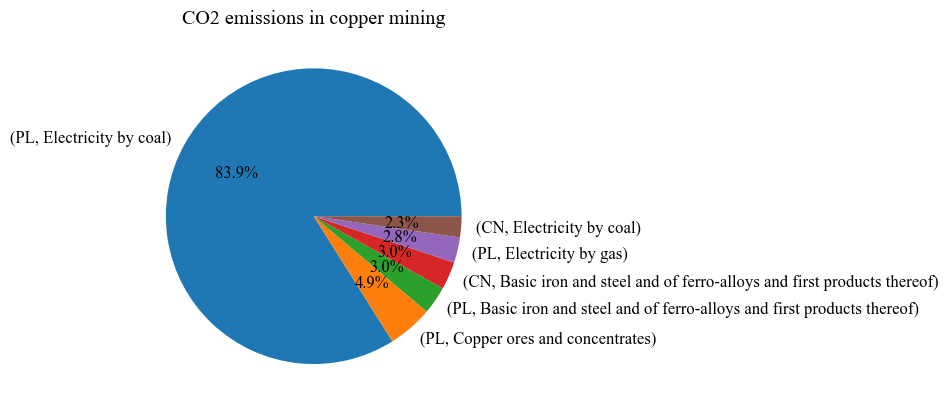

In [292]:
impact_mining['Carbon dioxide, fossil', 'tonnes', 'air'].nlargest(6).plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('CO2 emissions in copper mining')
plt.show()

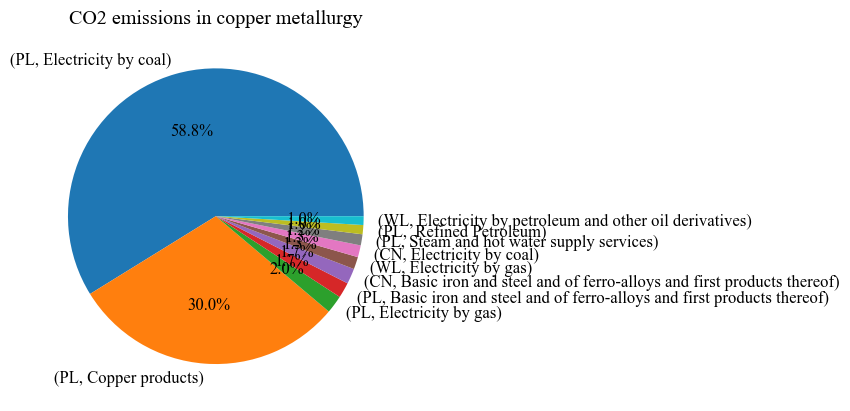

In [293]:
impact_metal['Carbon dioxide, fossil', 'tonnes', 'air'].nlargest(10).plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('CO2 emissions in copper metallurgy')
plt.show()

Bar chart of transport and no

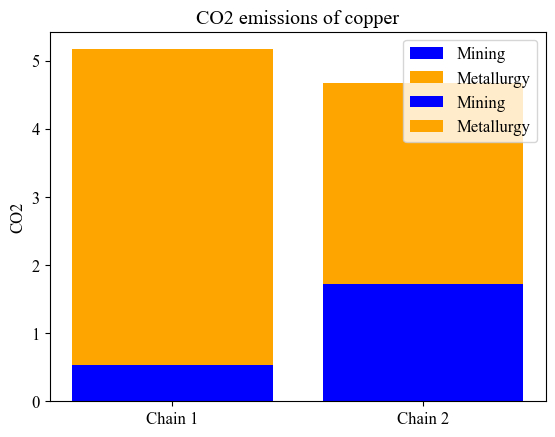

In [311]:
impact_mining_sum1=impact_mining_1['Carbon dioxide, fossil', 'tonnes', 'air'].sum()
impact_metal_sum1=impact_metal_1['Carbon dioxide, fossil', 'tonnes', 'air'].sum()
impact_mining_sum2=impact_mining_2['Carbon dioxide, fossil', 'tonnes', 'air'].sum()
impact_metal_sum2=impact_metal_2['Carbon dioxide, fossil', 'tonnes', 'air'].sum()

plt.bar(['Chain 1'], impact_mining_sum1, label='Mining', color='blue')
plt.bar(['Chain 1'], impact_metal_sum1, bottom=impact_mining_sum1, label='Metallurgy',color='orange')
plt.bar(['Chain 2'], impact_mining_sum2, label='Mining', color='blue')
plt.bar(['Chain 2'], impact_metal_sum2, bottom=impact_mining_sum2, label='Metallurgy',color='orange')

plt.ylabel('CO2')
plt.title('CO2 emissions of copper')
plt.legend()
plt.show()

bar chart of transport scenarios

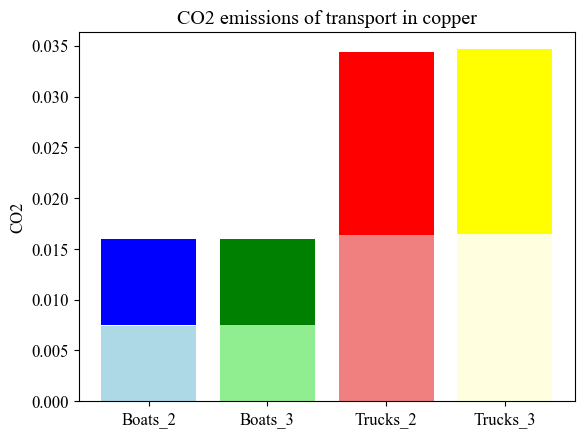

In [314]:
Boats_2_mining=M_eq_boats_2_mining.sum()
Boats_3_mining=M_eq_boats_3_mining.sum().squeeze() 
Trucks_2_mining=M_eq_trucks_2_mining.sum()  
Trucks_3_mining=M_eq_trucks_3_mining.sum().squeeze() 

Boats_2_metal=M_eq_boats_2_metal.sum()
Boats_3_metal=M_eq_boats_3_metal.sum().squeeze() 
Trucks_2_metal=M_eq_trucks_2_metal.sum()  
Trucks_3_metal=M_eq_trucks_3_metal.sum().squeeze() 

#colormap=cm.get_cmap('Greens')
#colors=[colormap(j) for j in np.linspace(0.3, 1, len(values))]

plt.bar(['Boats_2'], Boats_2_mining, label='Mining', color='lightblue')
plt.bar(['Boats_2'], Boats_2_metal, bottom=Boats_3_mining, label='Metallurgy',color='blue')
plt.bar(['Boats_3'], Boats_3_mining, label='Mining',color='lightgreen')
plt.bar(['Boats_3'], Boats_3_metal, bottom=Boats_3_mining, label='Metallurgy',color='green')
plt.bar(['Trucks_2'], Trucks_2_mining, label='Mining', color='lightcoral')
plt.bar(['Trucks_2'], Trucks_2_metal, bottom=Trucks_2_mining, label='Metallurgy',color='red')
plt.bar(['Trucks_3'], Trucks_3_mining, label='Mining', color='lightyellow')
plt.bar(['Trucks_3'], Trucks_3_metal, bottom=Trucks_3_mining, label='Metallurgy',color='yellow')

plt.ylabel('CO2')
plt.title('CO2 emissions of transport in copper')
plt.show()

For price of CO2 non-EU have to been removed

In [ ]:
price_co2=70.98 #Mean price of t of co2 in EU ETS in 2025
eu_countries=['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK'] #List of EU countries

Mining

In [296]:
Cost_boats_2_mining=[]
Cost_boats_3_mining=[]
Cost_trucks_2_mining=[]
Cost_trucks_3_mining=[]

if country_mining in eu_countries:
    for i, region in impact_boats_c_mining.items():
        if i in eu_countries:
            Boats_2=M_eq_boats_2_mining.loc[i]*price_co2
            Boats_3=M_eq_boats_3_mining.loc[i,'CO2-eq']*price_co2
            Trucks_2=M_eq_trucks_2_mining.loc[i]*price_co2
            Trucks_3=M_eq_trucks_3_mining.loc[i,'CO2-eq']*price_co2
        else:
            Boats_2=M_eq_boats_2_mining.loc[i]*price_co2/2
            Boats_3=M_eq_boats_3_mining.loc[i,'CO2-eq']*price_co2/2
            Trucks_2=M_eq_trucks_2_mining.loc[i]*price_co2/2
            Trucks_3=M_eq_trucks_3_mining.loc[i,'CO2-eq']*price_co2/2
        Cost_boats_2_mining.append(Boats_2)
        Cost_boats_3_mining.append(Boats_3)
        Cost_trucks_2_mining.append(Trucks_2)
        Cost_trucks_3_mining.append(Trucks_3)
else:
    for i, region in impact_boats_c_mining.items():
        if i in eu_countries:
            Boats_2=M_eq_boats_2_mining.loc[i]*price_co2/2
            Boats_3=M_eq_boats_3_mining.loc[i,'CO2-eq']*price_co2/2
            Trucks_2=M_eq_trucks_2_mining.loc[i]*price_co2/2
            Trucks_3=M_eq_trucks_3_mining.loc[i,'CO2-eq']*price_co2/2
        else:
            Boats_2=0
            Boats_3=0
            Trucks_2=0
            Trucks_3=0
        Cost_boats_2_mining.append(Boats_2)
        Cost_boats_3_mining.append(Boats_3)
        Cost_trucks_2_mining.append(Trucks_2)
        Cost_trucks_3_mining.append(Trucks_3)

Cost_boats_2_mining=pd.DataFrame(Cost_boats_2_mining)
Cost_boats_2_mining.index=impact_boats_c_mining.columns
Cost_boats_2_mining.columns=["CO2-eq"] #To name the columns
Cost_boats_3_mining=pd.DataFrame(Cost_boats_3_mining) 
Cost_boats_3_mining.index=impact_boats_c_mining.columns
Cost_boats_3_mining.columns=["CO2-eq"] #To name the columns
Cost_trucks_2_mining=pd.DataFrame(Cost_trucks_2_mining)
Cost_trucks_2_mining.index=impact_trucks_c_mining.columns
Cost_trucks_2_mining.columns=["CO2-eq"] #To name the columns
Cost_trucks_3_mining=pd.DataFrame(Cost_trucks_3_mining)
Cost_trucks_3_mining.index=impact_trucks_c_mining.columns
Cost_trucks_3_mining.columns=["CO2-eq"] #To name the columns

Metal

In [298]:
Cost_boats_2_metal=[]
Cost_boats_3_metal=[]
Cost_trucks_2_metal=[]
Cost_trucks_3_metal=[]

if country_metal in eu_countries:
    for i, region in impact_boats_c_metal.items():
        if i in eu_countries:
            Boats_2=M_eq_boats_2_metal.loc[i]*price_co2
            Boats_3=M_eq_boats_3_metal.loc[i,'CO2-eq']*price_co2
            Trucks_2=M_eq_trucks_2_metal.loc[i]*price_co2
            Trucks_3=M_eq_trucks_3_metal.loc[i,'CO2-eq']*price_co2
        else:
            Boats_2=M_eq_boats_2_metal.loc[i]*price_co2/2
            Boats_3=M_eq_boats_3_metal.loc[i,'CO2-eq']*price_co2/2
            Trucks_2=M_eq_trucks_2_metal.loc[i]*price_co2/2
            Trucks_3=M_eq_trucks_3_metal.loc[i,'CO2-eq']*price_co2/2
        Cost_boats_2_metal.append(Boats_2)
        Cost_boats_3_metal.append(Boats_3)
        Cost_trucks_2_metal.append(Trucks_2)
        Cost_trucks_3_metal.append(Trucks_3)
else:
    for i, region in impact_boats_c_metal.items():
        if i in eu_countries:
            Boats_2=M_eq_boats_2_metal.loc[i]*price_co2/2
            Boats_3=M_eq_boats_3_metal.loc[i,'CO2-eq']*price_co2/2
            Trucks_2=M_eq_trucks_2_metal.loc[i]*price_co2/2
            Trucks_3=M_eq_trucks_3_metal.loc[i,'CO2-eq']*price_co2/2
        else:
            Boats_2=0
            Boats_3=0
            Trucks_2=0
            Trucks_3=0
        Cost_boats_2_metal.append(Boats_2)
        Cost_boats_3_metal.append(Boats_3)
        Cost_trucks_2_metal.append(Trucks_2)
        Cost_trucks_3_metal.append(Trucks_3)

Cost_boats_2_metal=pd.DataFrame(Cost_boats_2_metal)
Cost_boats_2_metal.index=impact_boats_c_metal.columns
Cost_boats_2_metal.columns=["CO2-eq"] #To name the columns
Cost_boats_3_metal=pd.DataFrame(Cost_boats_3_metal) 
Cost_boats_3_metal.index=impact_boats_c_metal.columns
Cost_boats_3_metal.columns=["CO2-eq"] #To name the columns
Cost_trucks_2_metal=pd.DataFrame(Cost_trucks_2_metal)
Cost_trucks_2_metal.index=impact_trucks_c_metal.columns
Cost_trucks_2_metal.columns=["CO2-eq"] #To name the columns
Cost_trucks_3_metal=pd.DataFrame(Cost_trucks_3_metal)
Cost_trucks_3_metal.index=impact_trucks_c_metal.columns
Cost_trucks_3_metal.columns=["CO2-eq"] #To name the columns

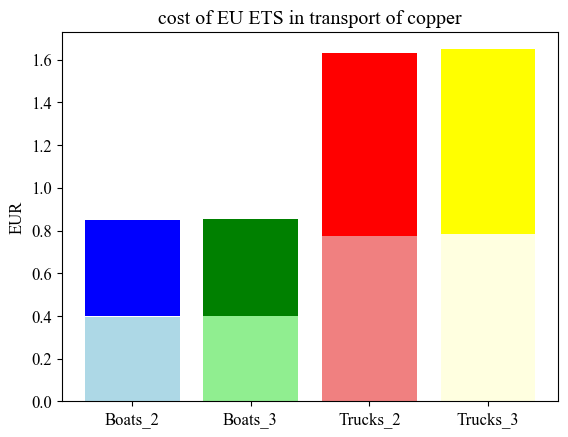

In [ ]:
Boats_2_mining_eco=Cost_boats_2_mining.sum()
Boats_3_mining_eco=Cost_boats_3_mining.sum().squeeze() 
Trucks_2_mining_eco=Cost_trucks_2_mining.sum()  
Trucks_3_mining_eco=Cost_trucks_3_mining.sum().squeeze() 

Boats_2_metal_eco=Cost_boats_2_metal.sum()
Boats_3_metal_eco=Cost_boats_3_metal.sum().squeeze() 
Trucks_2_metal_eco=Cost_trucks_2_metal.sum()  
Trucks_3_metal_eco=Cost_trucks_3_metal.sum().squeeze() 

#colormap=cm.get_cmap('Greens')
#colors=[colormap(j) for j in np.linspace(0.3, 1, len(values))]

plt.bar(['Boats_2'], Boats_2_mining_eco, label='Mining', color='lightblue')
plt.bar(['Boats_2'], Boats_2_metal_eco, bottom=Boats_3_mining_eco, label='Metallurgy',color='blue')
plt.bar(['Boats_3'], Boats_3_mining_eco, label='Mining',color='lightgreen')
plt.bar(['Boats_3'], Boats_3_metal_eco, bottom=Boats_3_mining_eco, label='Metallurgy',color='green')
plt.bar(['Trucks_2'], Trucks_2_mining_eco, label='Mining', color='lightcoral')
plt.bar(['Trucks_2'], Trucks_2_metal_eco, bottom=Trucks_2_mining_eco, label='Metallurgy',color='red')
plt.bar(['Trucks_3'], Trucks_3_mining_eco, label='Mining', color='lightyellow')
plt.bar(['Trucks_3'], Trucks_3_metal_eco, bottom=Trucks_3_mining_eco, label='Metallurgy',color='yellow')

plt.ylabel('EUR')
plt.title('cost of EU ETS in transport of copper')
plt.show()


# To save the values as TXT (change the name of file if you want)

In [ ]:
answer2=input("Do you want to save in txt files value of enivornmental, social and economic impact? Put y for yes, n for no").strip().lower()

if answer2=="y":
    impact_wanted.to_csv('Emissions_products.txt', sep='\t', index=True, header=True)
    #M_eq.to_csv('Environmental_impact.txt', sep='\t', index=True, header=True)
    #np.savetxt('M_social.txt',M_social, fmt="%s") #To save the M_social
    #np.savetxt('M_economic.txt',M_eco, fmt="%s") #To save the M_economic
    print("txt files are in the same folder of this file")
elif answer2=="n":
    print("Not saved")
else:
    print("Error please write y or n")

Not saved
